# Projeto 2 - Machine Learning na Segurança do Trabalho Prevendo a Eficiência de Extintores de Incêndio

O teste hidrostático extintor é um procedimento estabelecido pelas normas da ABNT NBR 12962/2016, que determinam que todos os extintores devem ser testados a cada cinco anos, com a finalidade de identificar eventuais vazamentos, além de também verificar a
resistência do material do extintor. Com isso, o teste hidrostático extintor pode ser realizado em baixa e alta pressão, de acordo com estas normas em questão. O procedimento é realizado por profissionais técnicos da área e com a utilização de aparelhos específicos e apropriados para o teste, visto que eles devem fornecer resultados com exatidão.

Seria possível usar Machine Learning para prever o funcionamento de um extintor de incêndio com base em simulações feitas em computador e assim incluir uma camada adicional de segurança nas operações de uma empresa? Esse é o objetivo do Projeto com Feedback 2.
Usando dados reais disponíveis publicamente, seu trabalho é desenvolver um modelo de Machine Learning capaz de prever a eficiência de extintores de incêndio. 

# Base dados
No link abaixo você encontra os dados necessários para o seu trabalho:

**Base dados** :https://www.muratkoklu.com/datasets/vtdhnd07.php


# Descrição do projeto
O conjunto de dados foi obtido como resultado dos testes de extinção de quatro chamas de combustíveis diferentes com um sistema de extinção de ondas sonoras. O sistema de extinção de incêndio por ondas sonoras consiste em 4 subwoofers com uma potência total de 4.000 Watts.
Existem dois amplificadores que permitem que o som chegue a esses subwoofers como  amplificado. A fonte de alimentação que alimenta o sistema e o circuito do filtro garantindo que as frequências de som sejam transmitidas adequadamente para o sistema está localizada dentro da unidade de controle. Enquanto o computador é usado como fonte de frequência, o anemômetro foi usado para medir o fluxo de ar resultante das ondas sonoras durante a fase de extinção da chama e um decibelímetro para medir a intensidade do som. Um termômetro infravermelho foi utilizado para medir a temperatura da chama e da lata de combustível, e uma câmera é instalada para detectar o tempo de extinção da chama. Um total de 17.442 testes foram realizados com esta configuração experimental. 

# Problema négocio
Os experimentos foram planejados da seguinte forma:

- Três diferentes combustíveis líquidos e combustível GLP foram usados para criar a chama.

- 5 tamanhos diferentes de latas de combustível líquido foram usados para atingir diferentes tamanhos de chamas.

- O ajuste de meio e cheio de gás foi usado para combustível GLP.

Durante a realização de cada experimento, o recipiente de combustível, a 10 cm de distância, foi movido para frente até 190 cm, aumentando a distância em 10 cm a cada vez. Junto com o recipiente de combustível, o anemômetro e o decibelímetro foram movidos para frente
nas mesmas dimensões. Experimentos de extinção de incêndio foram conduzidos com 54 ondas sonoras de frequências diferentes em cada distância e tamanho de chama. Ao longo dos experimentos de extinção de chama, os dados obtidos de cada dispositivo
de medição foram registrados e um conjunto de dados foi criado. O conjunto de dados inclui as características do tamanho do recipiente de combustível representando o tamanho da chama, tipo de combustível, frequência, decibéis, distância, fluxo de ar e extinção da chama. Assim, 6 recursos de entrada e 1 recurso de saída serão usados no modelo que você vai construir. 

# Objetivo 

**A coluna de status (extinção de chama ou não extinção da chama) pode ser prevista usando os seis recursos de entrada no conjunto de dados.**
Os recursos de status e combustível são categóricos, enquanto outros recursos são numéricos. Seu trabalho é construir um modelo de Machine Learning capaz de prever, com base em novos dados, se a chama será extinta ou não ao usar um extintor de incêndio.

# Objetivo modelo machine learning

**Definição**:

In [1]:
# Importação das bibliotecas 

# Bibliotecas sistema
import re
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 
from numpy.linalg import lstsq
from numpy.random import randn, seed

# Bibliotecas machine learning
import sklearn
from matplotlib import pyplot as plt

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

# Configuração para os gráficos largura e layout dos graficos
plt.style.use('fivethirtyeight')

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print('Versão python neste Jupyter Notebook:', python_version())

Author: Versões das bibliotecas

numpy     : 1.24.3
plotly    : 5.9.0
re        : 2.2.1
sklearn   : 0.0.post5
matplotlib: 3.7.1
watermark : 2.4.2
seaborn   : 0.12.2
pandas    : 2.0.3

Versão python neste Jupyter Notebook: 3.9.13


In [2]:
# Base dados
data = pd.read_excel("Acoustic_Extinguisher_Fire_Dataset.xlsx")
data

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [3]:
# Visualizando os 5 primeiros dados
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [4]:
# Visualizando os 5 últimos dados
data.tail()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0
17441,7,lpg,190,72,0.0,1,0


In [5]:
# Linhas e colunas
data.shape

(17442, 7)

In [6]:
# Info dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [7]:
# Tipos dados
data.dtypes

SIZE           int64
FUEL          object
DISTANCE       int64
DESIBEL        int64
AIRFLOW      float64
FREQUENCY      int64
STATUS         int64
dtype: object

In [10]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
SIZE,17442.0,3.411765,1.750977,1.0,2.0,3.0,5.0,7.0
DISTANCE,17442.0,100.000000,54.773826,10.0,50.0,100.0,150.0,190.0
DESIBEL,17442.0,96.379142,8.164096,72.0,90.0,95.0,104.0,113.0
AIRFLOW,17442.0,6.975634,4.736169,0.0,3.2,5.8,11.2,17.0
FREQUENCY,17442.0,31.611111,20.939149,1.0,14.0,27.5,47.0,75.0
STATUS,17442.0,0.497821,0.500010,0.0,0.0,0.0,1.0,1.0


# Limpeza dados

In [18]:
# Identificar e tratar valores ausentes

# Verificar a quantidade de valores ausentes em cada coluna
print(data.isnull().sum())

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64


In [19]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(data.shape[0]))
print("Números de colunas: {}" .format(data.shape[1]))

Números de linhas: 17442
Números de colunas: 7


In [20]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", data.isnull().sum().values.sum())
print("\nUnique values :  \n",data.nunique())


Missing values :   0

Unique values :  
 SIZE           7
FUEL           4
DISTANCE      19
DESIBEL       39
AIRFLOW      127
FREQUENCY     54
STATUS         2
dtype: int64


In [22]:
# Remover linhas duplicadas (considerando todas as colunas)
data.drop_duplicates(inplace=True)

In [23]:
# Remover linhas que contenham valores nulos em qualquer coluna
data.dropna(inplace=True)

In [24]:
# Preencher valores nulos com o valor anterior (forward fill)
data.fillna(method='ffill', inplace=True)

In [25]:
# Preencher valores nulos com o valor posterior (backward fill)
data.fillna(method='bfill', inplace=True)

In [26]:
# Interpolar valores nulos linearmente
data.interpolate(method='linear', inplace=True)

In [27]:
print(data.isnull().sum())

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64


## Análise exploratória

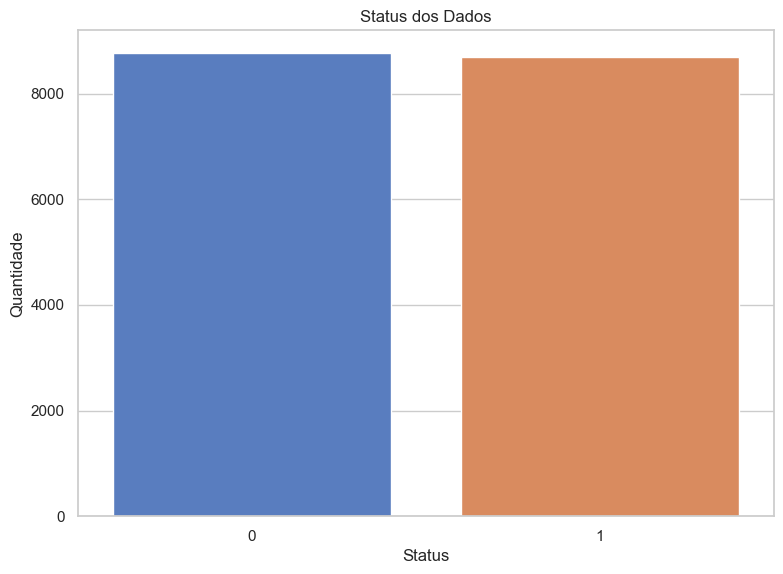

In [31]:
# Criar o gráfico de barras usando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x="STATUS", data=data, palette="muted")

# Personalizar o gráfico
plt.title("Status dos Dados")
plt.xlabel("Status")
plt.ylabel("Quantidade")

# Exibir o gráfico
plt.show()

Text(0, 0.5, 'Consumo de Combustível')

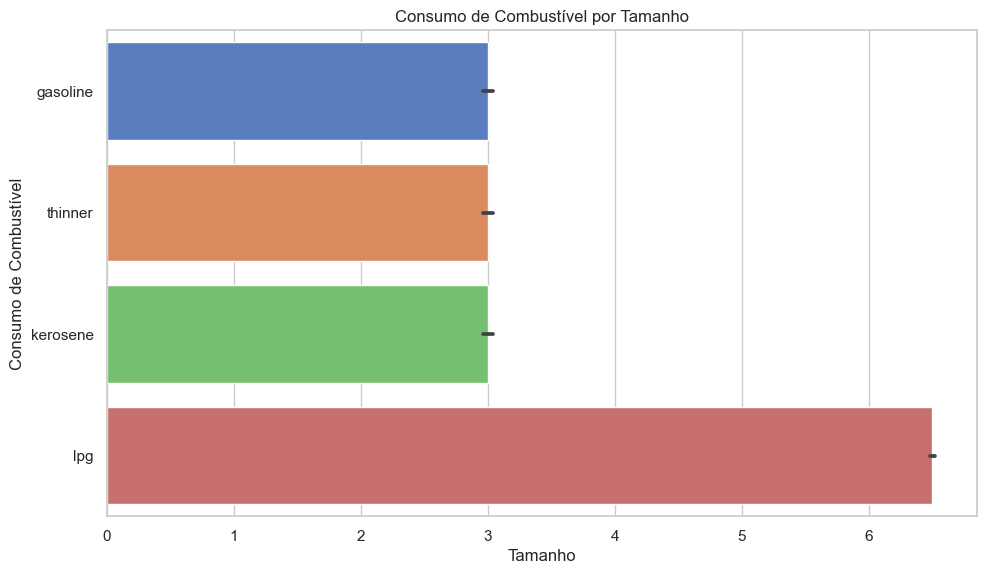

In [30]:
# Criar o gráfico de barras usando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="SIZE", y="FUEL", data=data, palette="muted")

# Personalizando o gráfico
plt.title("Consumo de Combustível por Tamanho")
plt.xlabel("Tamanho")
plt.ylabel("Consumo de Combustível")

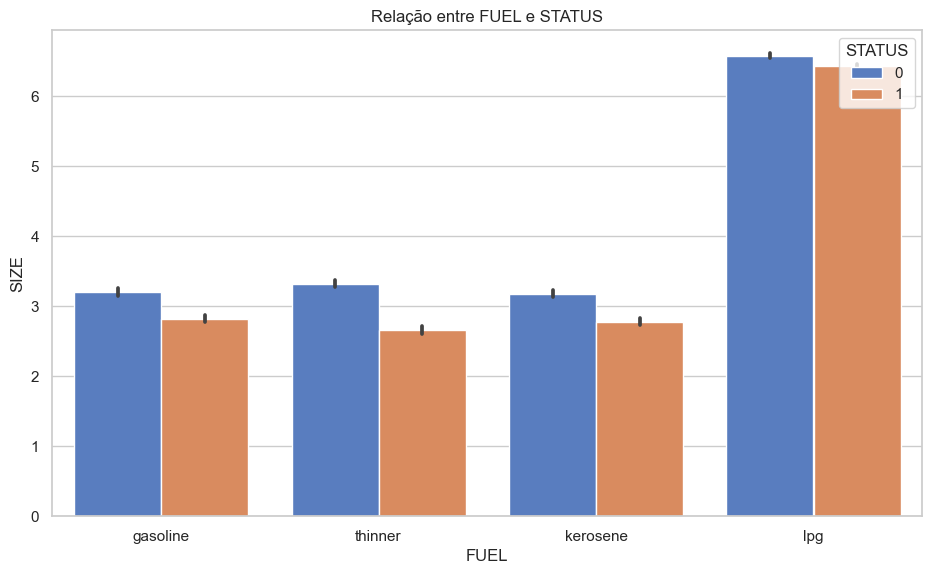

In [33]:
# Criar o gráfico de barras empilhadas usando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="FUEL", y="SIZE", hue="STATUS", data=data, palette="muted")

# Personalizar o gráfico
plt.title("Relação entre FUEL e STATUS")
plt.xlabel("FUEL")
plt.ylabel("SIZE")
plt.legend(title="STATUS", loc="upper right")

# Exibir o gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


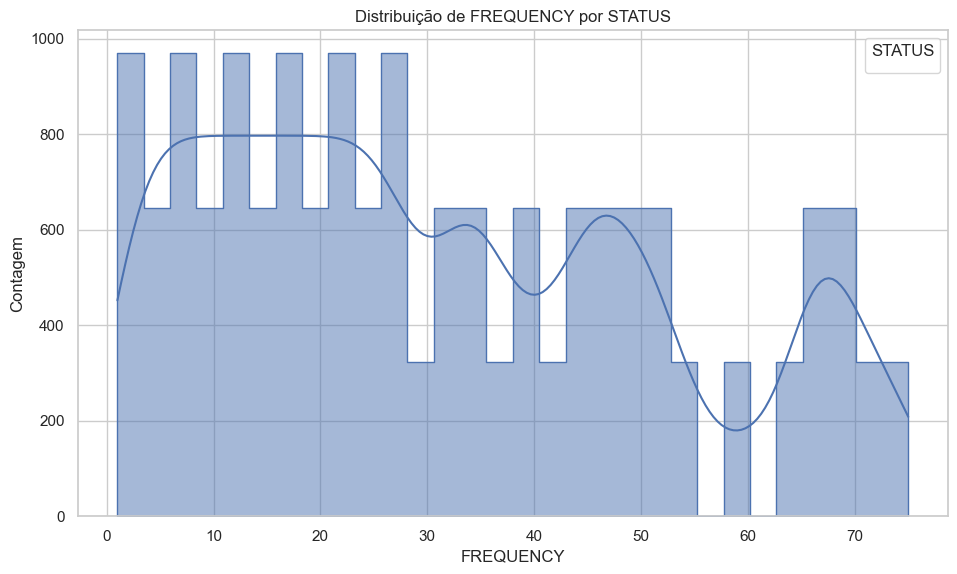

In [45]:
# Criar o histograma com Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="FREQUENCY", element="step", kde=True, palette="muted")

# Personalizar o gráfico
plt.title("Distribuição de FREQUENCY por STATUS")
plt.xlabel("FREQUENCY")
plt.ylabel("Contagem")
plt.legend(title="STATUS")

# Exibir o gráfico
plt.show()

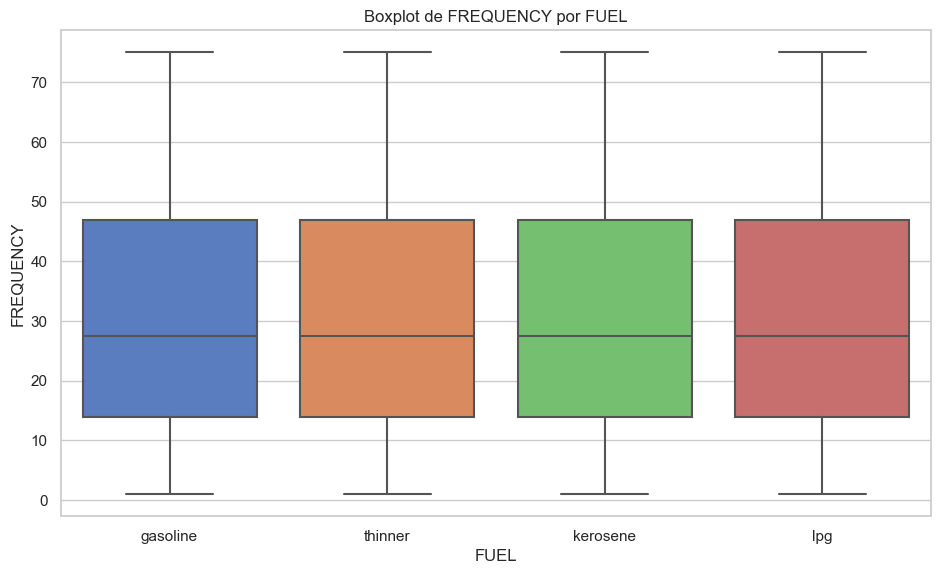

In [37]:
# Criar o boxplot usando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x="FUEL", y="FREQUENCY", data=data, palette="muted")

# Personalizar o gráfico
plt.title("Boxplot de FREQUENCY por FUEL")
plt.xlabel("FUEL")
plt.ylabel("FREQUENCY")

# Exibir o gráfico
plt.show()

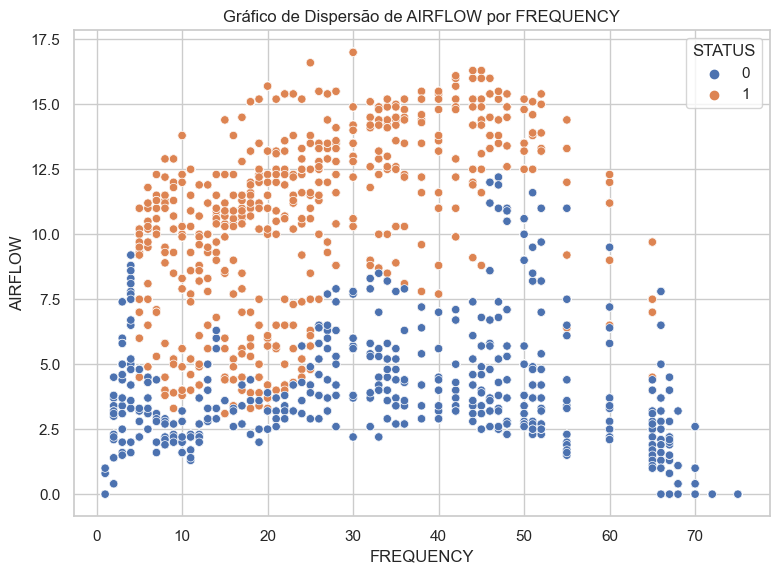

In [43]:
# Criar o gráfico de dispersão usando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x="FREQUENCY", y="AIRFLOW", hue = "STATUS", data=data, color="b")

# Personalizar o gráfico
plt.title("Gráfico de Dispersão de AIRFLOW por FREQUENCY")
plt.xlabel("FREQUENCY")
plt.ylabel("AIRFLOW")

# Exibir o gráfico
plt.show()

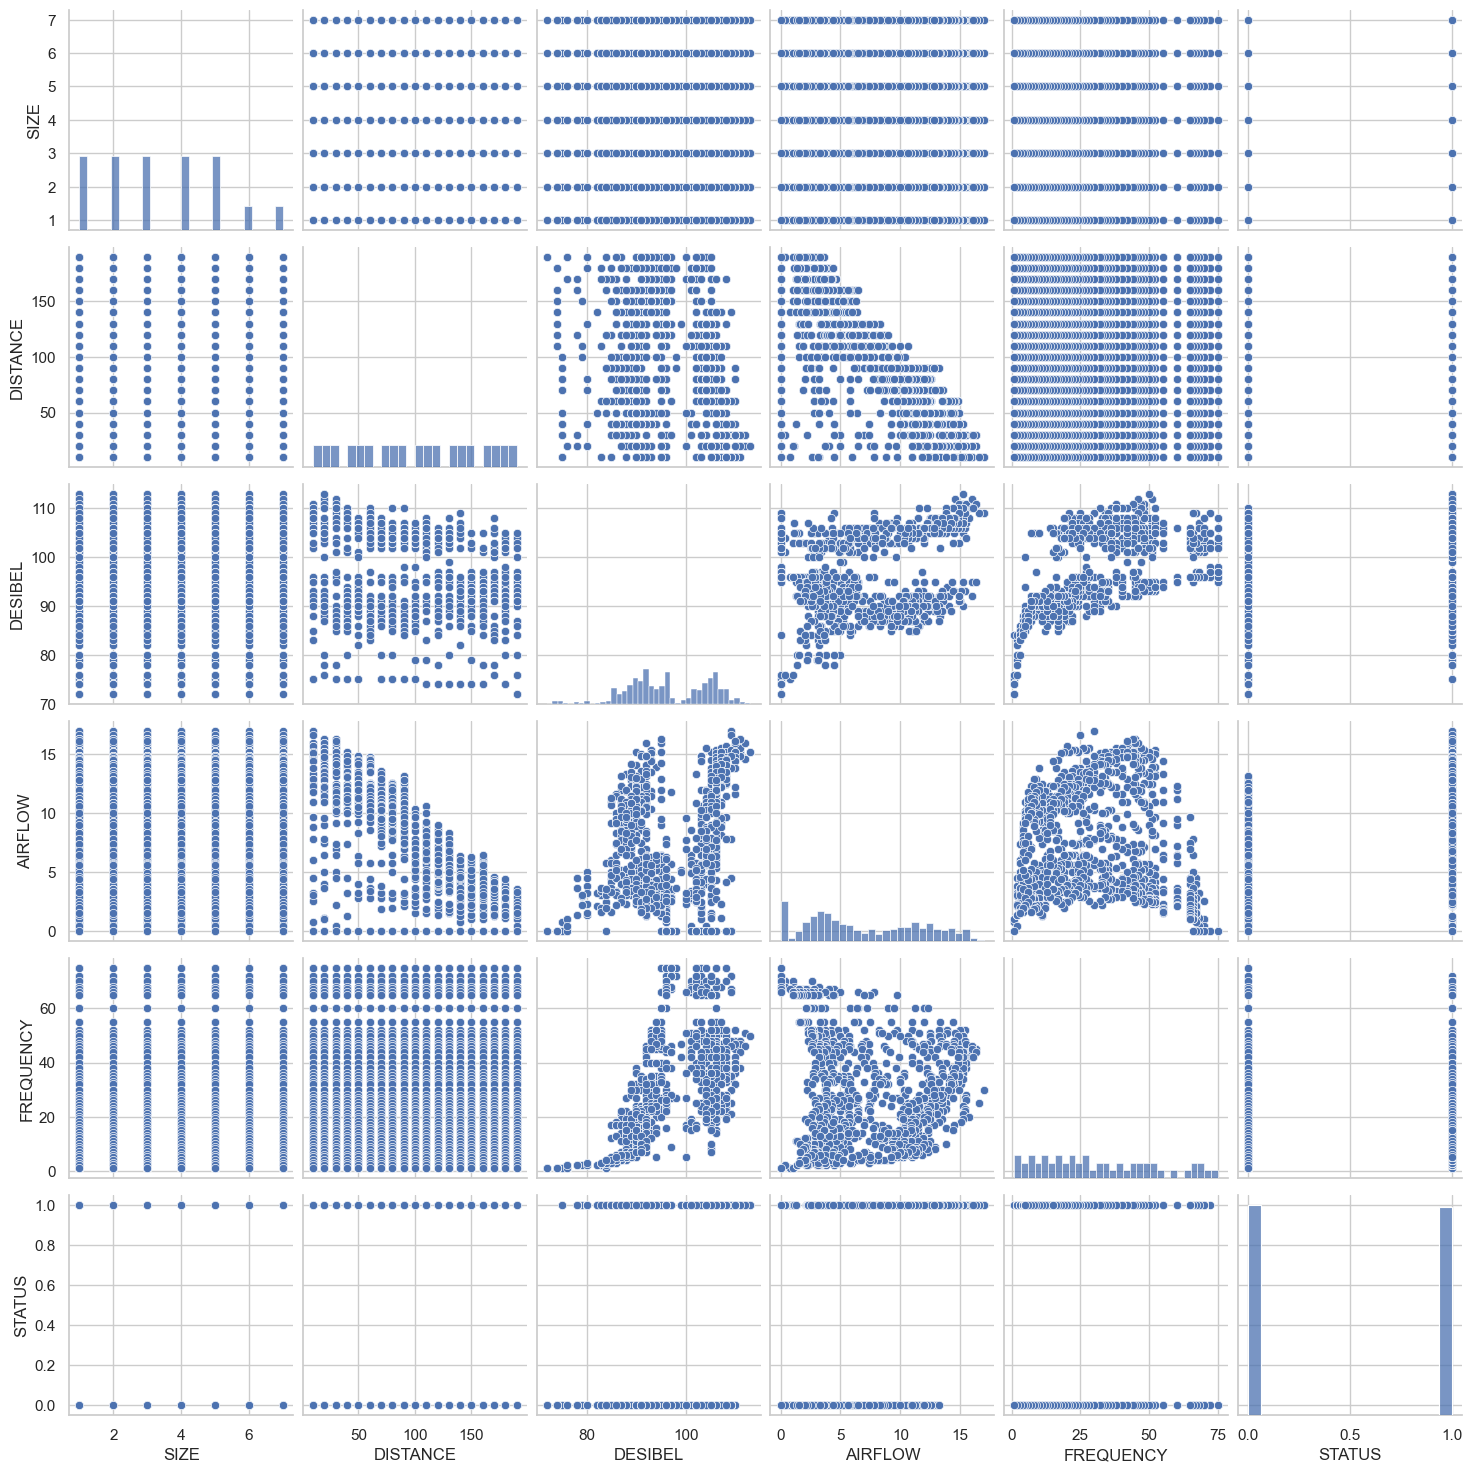

In [50]:
sns.pairplot(data)

# Pré-processamento


In [95]:
# Separando os atributos (X) e a coluna alvo (y)
x = data.drop("STATUS", axis=1)
y = data["STATUS"]

In [96]:
# Total de linhas e colunas dados variável x

x.shape

(17442, 6)

In [97]:
# Total de linhas e colunas dados variável y

y.shape

(17442,)

# One-hot

In [98]:
# Codificando variáveis categóricas usando one-hot
x = pd.get_dummies(x, columns=["FUEL"])

In [100]:
# Lidando com valores ausentes
x = x.fillna(X.mean())  # Preencher valores ausentes com a média

# Normalizando dados

In [101]:
from sklearn.preprocessing import StandardScaler

# Normalizando/Padronizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(x)

# Treinamento modelo 

- 20 para os dados de treino e 80 para teste e random state igual a zero

In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [103]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train.shape

(13953, 9)

In [104]:
# Total de linhas dos dados de treino y
y_train.shape

(13953,)

In [105]:
# Total de linhas e colunas dos dados de treino x teste 
x_test.shape

(3489, 9)

In [106]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(3489,)

# Modelo Machine learning

Modelo 1 - Regressão logistica

A regressão logística é um algoritmo de aprendizado de máquina supervisionado usado para realizar análise de classificação binária. Apesar do nome "regressão", a regressão logística é geralmente usada para problemas de classificação, onde o objetivo é prever a probabilidade de uma instância pertencer a uma das duas classes possíveis.

A regressão logística é adequada quando a variável dependente é binária (duas classes), como por exemplo, prever se um e-mail é spam ou não spam, se um paciente tem uma determinada doença ou não, se um cliente fará uma compra ou não, entre outros cenários.

O funcionamento da regressão logística é baseado em um modelo matemático que relaciona as variáveis independentes (características) a uma probabilidade estimada de pertencer a uma das classes. Essa probabilidade é calculada usando a função logística, também conhecida como função sigmoid:

f(x) = 1 / (1 + e ^ (-x))

Nesse contexto, a regressão logística estima os coeficientes (pesos) que multiplicam as características de entrada e as soma ponderadamente para calcular o valor do logito. O logito é então passado pela função sigmoid para obter uma probabilidade entre 0 e 1.

Durante o treinamento do modelo de regressão logística, os coeficientes são ajustados por meio de um processo iterativo, usando técnicas de otimização como a descida de gradiente (gradient descent), com o objetivo de minimizar a diferença entre as probabilidades previstas e os rótulos reais dos dados de treinamento.

Após o treinamento, o modelo de regressão logística é capaz de fazer previsões para novos exemplos, atribuindo uma probabilidade de pertencer a cada uma das classes. É comum usar um limiar (threshold) para tomar uma decisão final de classificação: se a probabilidade estimada for superior ao limiar, a instância é classificada como pertencente à classe positiva; caso contrário, é classificada como pertencente à classe negativa.

A regressão logística é amplamente utilizada em diferentes áreas, incluindo ciência de dados, medicina, marketing, finanças e muitas outras, devido à sua simplicidade, interpretabilidade e bom desempenho em problemas de classificação binária. Além disso, a regressão logística pode ser estendida para problemas de classificação multiclasse usando técnicas como a regressão logística multinomial ou a regressão logística ordinal.

In [107]:
%%time

# Modelo de regressão logistica 

# Importação da biblioteca
from sklearn.linear_model import LogisticRegression

# Nome do algoritmo M.L
model_logistic = LogisticRegression() 

# Treinamento do modelo
model_logistic_fit = model_logistic.fit(x_train, y_train)

# Score do modelo dados treino x
model_logistic_score = model_logistic.score(x_train, y_train)

# Score do modelo dados treino y
print("Model - Logistic Regression: %.2f" % (model_logistic_score * 100))

Model - Logistic Regression: 89.94
CPU times: total: 0 ns
Wall time: 134 ms


In [114]:
# Previsão modelo com função predict de previsão das frases

model_logistic_pred = model_logistic.predict(x_test)
model_logistic_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
# Previsão modelo com função log_proba de probabilidades das frases

model_logistic_prob = model_logistic.predict_log_proba(x_train)
model_logistic_prob

array([[-0.02520009, -3.69348127],
       [-0.01481484, -4.21952432],
       [-3.33114162, -0.03640703],
       ...,
       [-0.07452888, -2.63360155],
       [-0.14422122, -2.00765101],
       [-0.31311555, -1.31365904]])

# O que é Acúracia
A acurácia é uma métrica comumente usada para avaliar o desempenho de um modelo de aprendizado de máquina em problemas de classificação. Ela mede a proporção de instâncias classificadas corretamente em relação ao número total de instâncias no conjunto de dados. A fórmula básica para calcular a acurácia é:

Acurácia = (Número de instâncias classificadas corretamente) / (Número total de instâncias)

A acurácia é expressa como um valor entre 0 e 1, onde 1 representa uma acurácia perfeita, indicando que todas as instâncias foram classificadas corretamente, e 0 representa uma acurácia nula, indicando que nenhuma instância foi classificada corretamente. A acurácia é uma métrica simples e fácil de entender, sendo amplamente utilizada como uma medida inicial do desempenho de um modelo. No entanto, ela pode não ser adequada para todos os problemas, especialmente quando os conjuntos de dados estão desequilibrados, ou seja, quando uma classe é muito mais frequente do que a outra. Nesses casos, outras métricas, como precisão, recall ou F1-score, podem fornecer uma visão mais completa e precisa do desempenho do modelo. É importante ressaltar que a acurácia por si só não é suficiente para avaliar completamente a qualidade de um modelo. Outras métricas e considerações, como matriz de confusão, curvas ROC (Receiver Operating Characteristic) e validação cruzada, devem ser levadas em conta para obter uma compreensão mais abrangente do desempenho do modelo em diferentes aspectos.

In [116]:
# Acúracia do modelo de Regressão logística
from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test, model_logistic_pred)
print("Acurácia - Regressão logística: %.2f" % (accuracy_dt * 100))

Acurácia - Regressão logística: 89.62


# Classification report

O classification report é um relatório que fornece uma visão detalhada das métricas de desempenho de um modelo de classificação. Ele é especialmente útil para problemas de classificação multiclasse, onde o modelo tem a tarefa de classificar instâncias em mais de duas classes. O classification report geralmente inclui as seguintes métricas para cada classe do problema de classificação:

1) Precision (precisão): A precisão é a proporção de instâncias classificadas corretamente para uma determinada classe em relação ao número total de instâncias classificadas como essa classe. Ela mede a qualidade das previsões positivas para a classe em questão.

2) Recall (revocação) ou Sensitivity (sensibilidade): O recall é a proporção de instâncias classificadas corretamente para uma determinada classe em relação ao número total de instâncias reais dessa classe. Ele mede a capacidade do modelo de identificar corretamente as instâncias positivas para a classe em questão.

3) F1-score: O F1-score é uma medida que combina precisão e recall em uma única métrica. É a média harmônica dessas duas métricas e fornece uma medida geral do desempenho do modelo para uma determinada classe.

4) Support (suporte): O suporte é o número total de instâncias reais para uma determinada classe no conjunto de dados. Ele fornece informações sobre a distribuição das instâncias nas diferentes classes.

Além dessas métricas para cada classe, o classification report geralmente inclui a média dessas métricas, considerando todas as classes, o que dá uma visão geral do desempenho global do modelo. Essas médias podem ser calculadas de várias formas, como a média aritmética simples (macro-average), a média ponderada pelo suporte de cada classe (weighted average) ou a média ponderada pela frequência real de cada classe (micro-average). O classification report é uma ferramenta útil para avaliar o desempenho do modelo de classificação, pois oferece uma visão detalhada das métricas para cada classe individualmente e para o conjunto de dados como um todo. Ele permite identificar classes com desempenho inferior, verificar o equilíbrio das métricas em diferentes classes e tomar decisões informadas sobre ajustes no modelo, como ações de ajuste de limiar ou ponderação de classes desequilibradas.

In [117]:
# Classification report
from sklearn.metrics import classification_report

classification = classification_report(model_logistic_pred, y_test)
print("Modelo - Regressão logística")
print()
print(classification)

Modelo - Regressão logística

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1779
           1       0.88      0.91      0.90      1710

    accuracy                           0.90      3489
   macro avg       0.90      0.90      0.90      3489
weighted avg       0.90      0.90      0.90      3489



# O que é confusion matrix

Confusion matrix (matriz de confusão) é uma tabela que descreve o desempenho de um modelo de classificação, fornecendo uma visão detalhada das previsões feitas pelo modelo em comparação com as classes reais do conjunto de dados. A matriz de confusão tem dimensões KxK, onde K representa o número de classes no problema de classificação. Cada célula da matriz de confusão fornece informações sobre a contagem ou frequência das instâncias classificadas em uma classe verdadeira (linha) em relação à classe prevista (coluna). Aqui estão os elementos principais de uma matriz de confusão:

- Verdadeiro Positivo (True Positive, TP): O número de instâncias que foram corretamente classificadas como positivas para a classe verdadeira.

- Falso Positivo (False Positive, FP): O número de instâncias que foram incorretamente classificadas como positivas para a classe verdadeira. Também é conhecido como erro do Tipo I.

- Verdadeiro Negativo (True Negative, TN): O número de instâncias que foram corretamente classificadas como negativas para a classe verdadeira.

- Falso Negativo (False Negative, FN): O número de instâncias que foram incorretamente classificadas como negativas para a classe verdadeira. Também é conhecido como erro do Tipo II.

A matriz de confusão permite visualizar facilmente os erros de classificação feitos pelo modelo. Ela fornece uma visão geral dos resultados do modelo, destacando as áreas em que o modelo está acertando e errando em relação a cada classe. Com base na matriz de confusão, várias métricas de desempenho podem ser calculadas, incluindo precisão (precision), recall (revocação), F1-score e acurácia. Essas métricas podem ajudar a avaliar o desempenho global do modelo e entender sua capacidade de fazer previsões corretas para diferentes classes.

A matriz de confusão é uma ferramenta importante para avaliar e diagnosticar o desempenho do modelo de classificação, especialmente em problemas multiclasse ou quando há desequilíbrio nas classes do conjunto de dados. Ela oferece informações mais detalhadas do que a acurácia sozinha, permitindo uma análise mais precisa das previsões do modelo e identificação de áreas para melhoria.

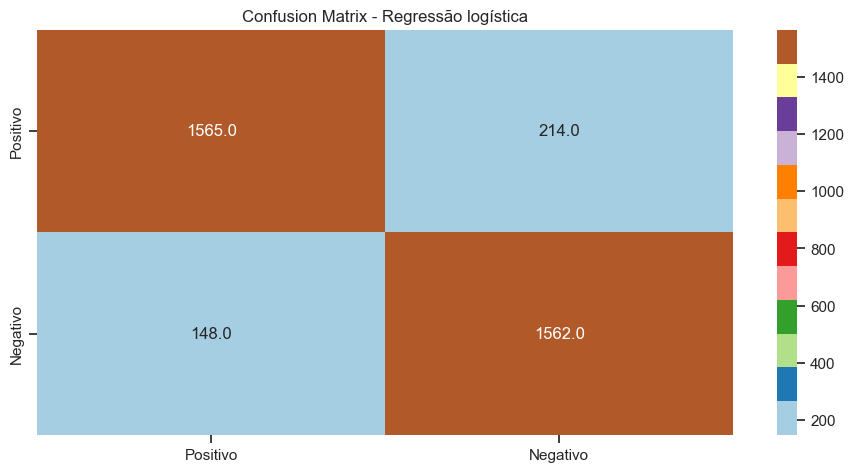

In [119]:
from sklearn.metrics import confusion_matrix

matrix_1 = confusion_matrix(model_logistic_pred, y_test)

# Plot matriz de confusão
plt.figure(figsize=(10, 5))

ax = plt.subplot()
sns.heatmap(matrix_1, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Regressão logística'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo"]);

Modelo 02 - Naive bayes

Naive Bayes é um algoritmo de aprendizado de máquina baseado no teorema de Bayes e é amplamente utilizado em problemas de classificação. O algoritmo Naive Bayes é considerado "ingênuo" (naive) porque assume uma independência entre as características (variáveis preditoras) do conjunto de dados, o que pode não ser realista em muitos casos.

O teorema de Bayes é uma teoria estatística que descreve a probabilidade condicional de um evento A ocorrer, dado que o evento B já ocorreu. O algoritmo Naive Bayes utiliza esse teorema para calcular a probabilidade de uma instância pertencer a uma determinada classe, com base nas características observadas dessa instância.

A suposição de independência entre as características é a principal simplificação do algoritmo Naive Bayes. Isso significa que o algoritmo considera que as características são independentes entre si, ou seja, a presença ou valor de uma característica não é influenciado pelas outras características. Essa suposição simplificadora pode não ser válida em todos os casos, mas mesmo assim, o Naive Bayes tem sido amplamente utilizado e mostra bom desempenho em muitas situações.

O Naive Bayes usa o teorema de Bayes para calcular a probabilidade posterior de cada classe dado um conjunto de características observadas. A fórmula básica do teorema de Bayes é a seguinte:

P(classe | características) = (P(características | classe) * P(classe)) / P(características)

Nessa fórmula, P(classe | características) é a probabilidade posterior da classe, P(características | classe) é a probabilidade de observar as características dadas a classe, P(classe) é a probabilidade a priori da classe (baseada na frequência de cada classe no conjunto de treinamento) e P(características) é a probabilidade das características observadas (constante para todas as classes).

O algoritmo Naive Bayes estima essas probabilidades a partir dos dados de treinamento e usa-as para fazer previsões para novas instâncias. As características podem ser categóricas ou contínuas, e diferentes variantes do Naive Bayes (como Naive Bayes Gaussiano, Naive Bayes Multinomial, Naive Bayes Bernoulli) são usadas para diferentes tipos de dados.

O Naive Bayes é amplamente aplicado em problemas de classificação, como filtragem de spam, categorização de documentos, diagnóstico médico, detecção de fraudes, entre outros. Ele é conhecido por sua simplicidade, eficiência computacional e bom desempenho em conjuntos de dados de grande escala, embora possa não ser adequado para problemas com dependências complexas entre as características.

In [120]:
%%time

# Modelo machine learning - Naive bayes

# Importação da biblioteca
from sklearn.naive_bayes import MultinomialNB

# Nome do algoritmo M.L
model_naive_bayes = MultinomialNB()

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(x_train, y_train)

# Score do modelo dados treino x
model_naive_bayes_scor = model_naive_bayes.score(x_train, y_train)

 # Score do modelo dados treino y
print("Model - Naive Bayes: %.2f" % (model_naive_bayes_scor * 100))

Model - Naive Bayes: 81.98
CPU times: total: 15.6 ms
Wall time: 20.9 ms


In [122]:
# Previsão modelo com função predict de previsã das frases

model_naive_bayes_pred = model_naive_bayes.predict(x_test)
model_naive_bayes_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
accuracy_nb = accuracy_score(y_test, model_naive_bayes_pred)
print("Acurácia - Naive bayes: %.2f" % (accuracy_nb * 100))

Acurácia - Naive bayes: 82.72


In [124]:
# Classification report
classification = classification_report(model_naive_bayes_pred, y_test)
print("Modelo - Naive bayes")
print()
print(classification)

Modelo - Naive bayes

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1840
           1       0.79      0.86      0.82      1649

    accuracy                           0.83      3489
   macro avg       0.83      0.83      0.83      3489
weighted avg       0.83      0.83      0.83      3489



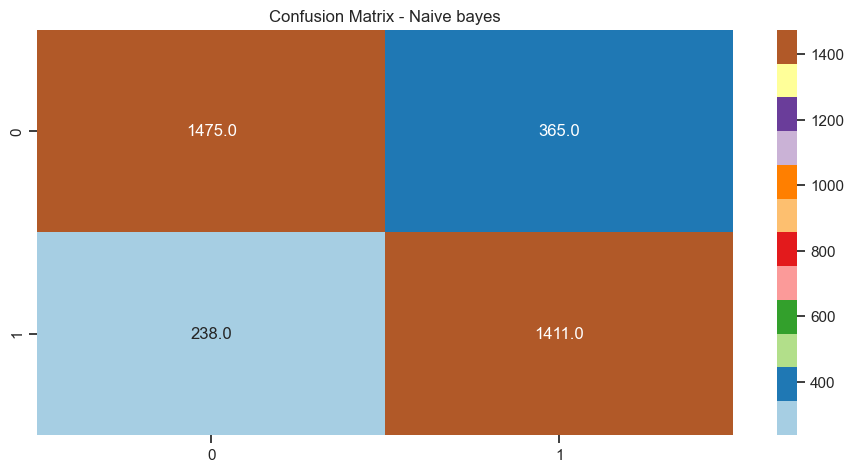

In [125]:
# Confusion matrix
matrix_2 = confusion_matrix(model_naive_bayes_pred, y_test)

# Plot confusion matrix
plt.figure(figsize=(10, 5))

ax = plt.subplot()
sns.heatmap(matrix_2, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Naive bayes'); 

Modelo 03 - Decision tree

Decision tree (árvore de decisão) é um algoritmo de aprendizado de máquina supervisionado que é amplamente utilizado para problemas de classificação e regressão. Esse algoritmo cria uma representação estruturada em forma de árvore das decisões e possíveis resultados com base nas características dos dados de treinamento.

Uma árvore de decisão é composta por nós (nós de decisão) e ramos (ramos de decisão). Cada nó de decisão corresponde a uma característica do conjunto de dados e divide o conjunto em subconjuntos menores com base nessa característica. Os ramos representam os diferentes valores dessa característica e levam a outros nós de decisão ou a folhas (nós terminais) que contêm as classes ou valores de regressão.

Durante o treinamento do modelo de árvore de decisão, o algoritmo busca encontrar a melhor característica para fazer as divisões em cada nó de decisão, com base em algum critério de impureza ou ganho de informação, como o índice Gini ou entropia. O objetivo é maximizar a pureza ou a homogeneidade das classes nos subconjuntos resultantes.

Uma vez que a árvore de decisão é construída, ela pode ser usada para fazer previsões para novas instâncias. A instância percorre a árvore, seguindo os ramos de acordo com os valores das características, até chegar a uma folha que fornece a classe prevista ou o valor de regressão.

As árvores de decisão têm várias vantagens, como a facilidade de interpretação e explicação dos resultados. Elas também podem lidar com dados categóricos e numéricos e são robustas em relação a outliers e valores ausentes. Além disso, as árvores de decisão podem capturar relacionamentos não lineares e interações entre as características.

No entanto, as árvores de decisão podem ser propensas ao overfitting se não forem controladas adequadamente. O overfitting ocorre quando a árvore é muito complexa e se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados. Para evitar isso, técnicas como poda (pruning), limite de profundidade máxima da árvore e ajuste de hiperparâmetros podem ser aplicadas.

As árvores de decisão são amplamente utilizadas em diferentes domínios, desde diagnóstico médico até detecção de fraudes, seleção de recursos, análise de crédito, entre outros. Além disso, existem variações do algoritmo, como Random Forests (florestas aleatórias) e Gradient Boosting Trees (árvores de impulso), que melhoram o desempenho combinando várias árvores de decisão.

In [126]:
%%time

# Importando biblioteca
from sklearn.tree import DecisionTreeClassifier 

# Criando modelo decision tree
model_dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)

# Treinamento modelo
model_dtc_fit = model_dtc.fit(x_train, y_train)

# Score de modelo
model_dtc_score = model_dtc.score(x_train, y_train)
print("Modelo - Decision Tree Classifier: %.2f" % (model_dtc_score * 100))

Modelo - Decision Tree Classifier: 89.51
CPU times: total: 0 ns
Wall time: 3.99 s


In [127]:
# Previsão modelo
modelo_arvore_cla_1_predict = model_dtc.predict(x_test)
modelo_arvore_cla_1_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

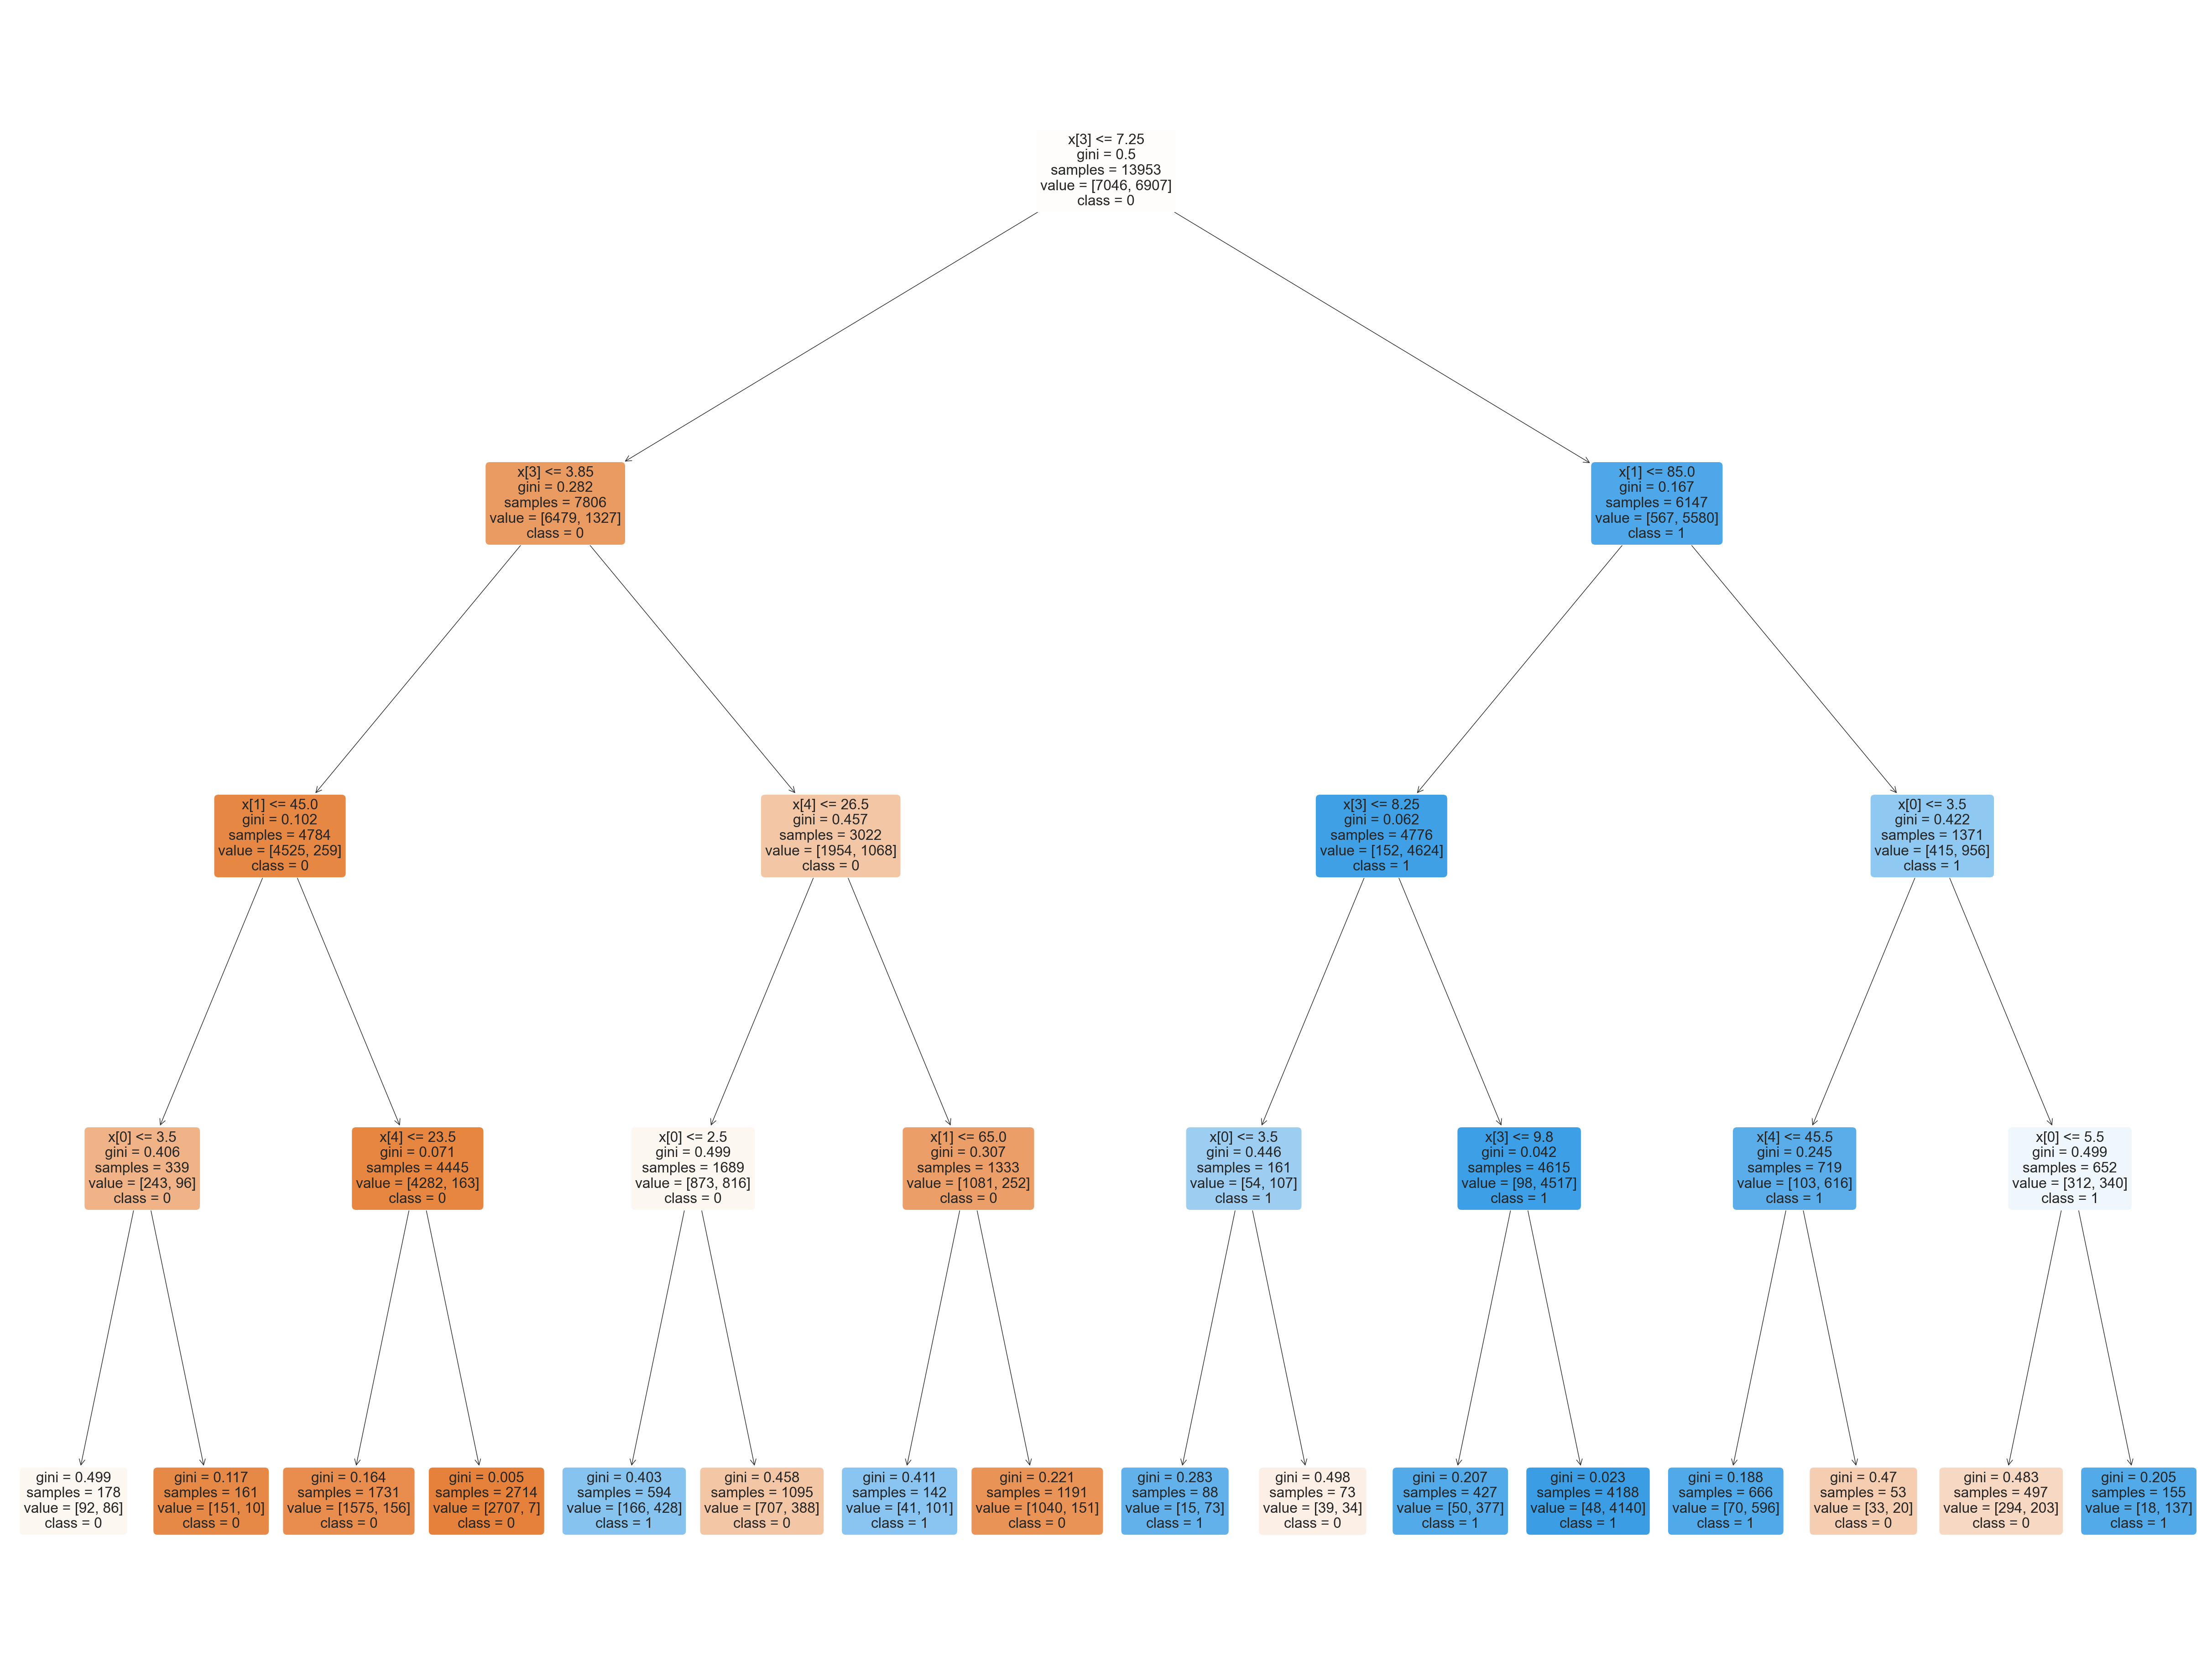

In [129]:
# plot tree

# importando biblioteca para plotar tree
from sklearn import tree

fig, ax = plt.subplots(figsize=(55.5, 45), facecolor = "w")
tree.plot_tree(model_dtc, 
               ax = ax, 
               fontsize = 22.8, 
               rounded = True, 
               filled = True, 
               class_names = ["0", "1"])
plt.show()

In [130]:
# Accuracy modelo
acuracia_decision_tree = accuracy_score(y_test, modelo_arvore_cla_1_predict)
print("Accuracy - Decision Tree: %.2f" % (acuracia_decision_tree * 100))

Accuracy - Decision Tree: 88.94


In [131]:
# Classification report de modelo
class_report = classification_report(y_test, modelo_arvore_cla_1_predict)
print("Modelo - Decision Tree")
print("\n")
print(class_report)

Modelo - Decision Tree


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1713
           1       0.93      0.84      0.89      1776

    accuracy                           0.89      3489
   macro avg       0.89      0.89      0.89      3489
weighted avg       0.89      0.89      0.89      3489



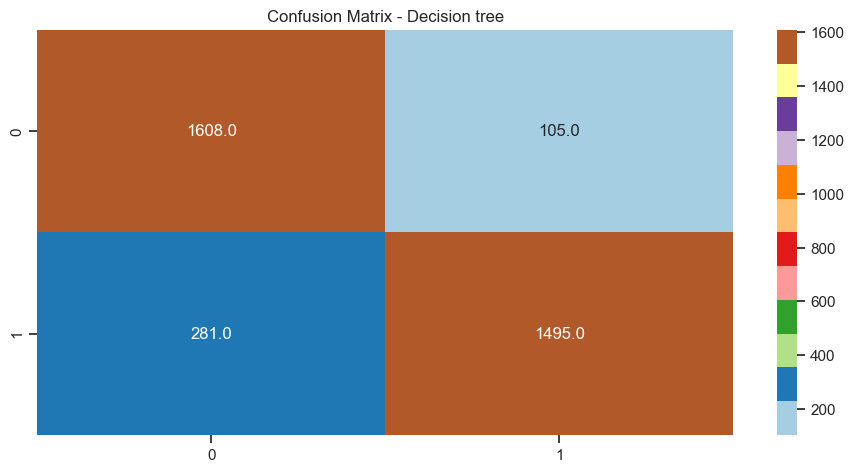

In [132]:
# matrix confusion
matrix_confusion_3 = confusion_matrix(y_test, modelo_arvore_cla_1_predict)

plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Decision tree'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

**Modelo 04 - KNN**

O modelo K-NN (k-nearest neighbors) é um algoritmo de aprendizado de máquina supervisionado usado para classificação e regressão. O K-NN é um dos algoritmos mais simples e intuitivos de entender e implementar. O K-NN funciona com base no princípio de que instâncias semelhantes tendem a compartilhar a mesma classe ou valor de saída. O algoritmo classifica ou prevê o valor de uma nova instância com base nos k vizinhos mais próximos no conjunto de treinamento. Aqui está uma descrição geral de como o K-NN funciona:

Treinamento: Durante a etapa de treinamento, o algoritmo armazena as instâncias rotuladas do conjunto de treinamento, mantendo as características e os rótulos associados a elas.

Classificação: Para classificar uma nova instância, o K-NN calcula a distância entre a nova instância e todas as instâncias do conjunto de treinamento. A distância pode ser medida usando diferentes métricas, como distância euclidiana ou distância de Manhattan. As k instâncias mais próximas (com base na distância) são selecionadas.

Votação: Para classificação, os rótulos das k instâncias mais próximas são considerados. O rótulo mais frequente entre essas instâncias é atribuído à nova instância como a sua classe prevista. Em caso de empate, pode-se usar votação ponderada ou algum critério adicional.

Regressão: Para regressão, os valores de saída das k instâncias mais próximas são considerados. O valor médio ou mediano desses valores é atribuído à nova instância como seu valor de regressão previsto.

**Encontrando o valor de K**

O valor de k, conhecido como hiperparâmetro do modelo, determina quantos vizinhos são considerados na classificação ou regressão. A escolha de um valor adequado para k é importante, pois um valor muito baixo pode levar a uma classificação ou regressão sensível a outliers, enquanto um valor muito alto pode levar a uma perda de detalhes e informações.

O K-NN é um algoritmo não paramétrico, o que significa que ele não faz suposições explícitas sobre a distribuição dos dados. Ele também pode lidar com dados com várias classes e pode ser adaptado para lidar com dados categóricos ou numéricos.

No entanto, o K-NN pode ser computacionalmente intensivo quando o conjunto de treinamento é grande, pois requer o cálculo da distância entre todas as instâncias. Além disso, a escolha da métrica de distância adequada e a normalização dos dados podem influenciar significativamente o desempenho do K-NN.

O K-NN é comumente utilizado em várias áreas, como reconhecimento de padrões, sistemas de recomendação, processamento de imagens e análise de dados. É uma técnica flexível e versátil, mas é importante ajustar seus parâmetros e considerar as características específicas dos dados antes de aplicá-lo.

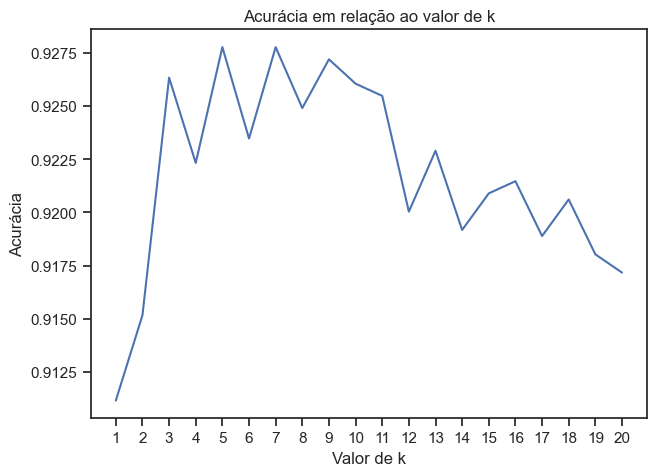

CPU times: total: 219 ms
Wall time: 1.45 s


In [134]:
%%time

# Importando biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Lista de valores de k a serem testados
k_values = list(range(1, 21))  # Substitua pelos valores de k que deseja testar

# Lista para armazenar as acurácias
accuracies = []

# Iterar sobre os valores de k e calcular a acurácia
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotar o gráfico de acurácia versus k
plt.plot(k_values, accuracies)
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.title('Acurácia em relação ao valor de k')
plt.xticks(k_values)
plt.show()

In [136]:
%%time

# Importando biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Criando modelo
model_knn = KNeighborsClassifier(n_neighbors= 8)

# Treinamento modelo
model_knn_fit = model_knn.fit(x_train, y_train)

# Score modelo
model_knn_score = model_knn.score(x_train, y_train)
print("Modelo - K-NN: %.2f" % (model_knn_score * 100))

Modelo - K-NN: 93.68
CPU times: total: 15.6 ms
Wall time: 234 ms


In [137]:
# Previsão do modelo do k-nn
model_knn_pred = model_knn.predict(x_test)
model_knn_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [138]:
# Accuracy score model
accuracy_knn = accuracy_score(y_test, model_knn_pred)
print("Acurácia - K-NN: %.2f" % (accuracy_knn * 100))

Acurácia - K-NN: 92.49


In [139]:
# Classification report model knn
class_report = classification_report(y_test, modelo_arvore_cla_1_predict)
print("Modelo - K-NN")
print("\n")
print(class_report)

Modelo - K-NN


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1713
           1       0.93      0.84      0.89      1776

    accuracy                           0.89      3489
   macro avg       0.89      0.89      0.89      3489
weighted avg       0.89      0.89      0.89      3489



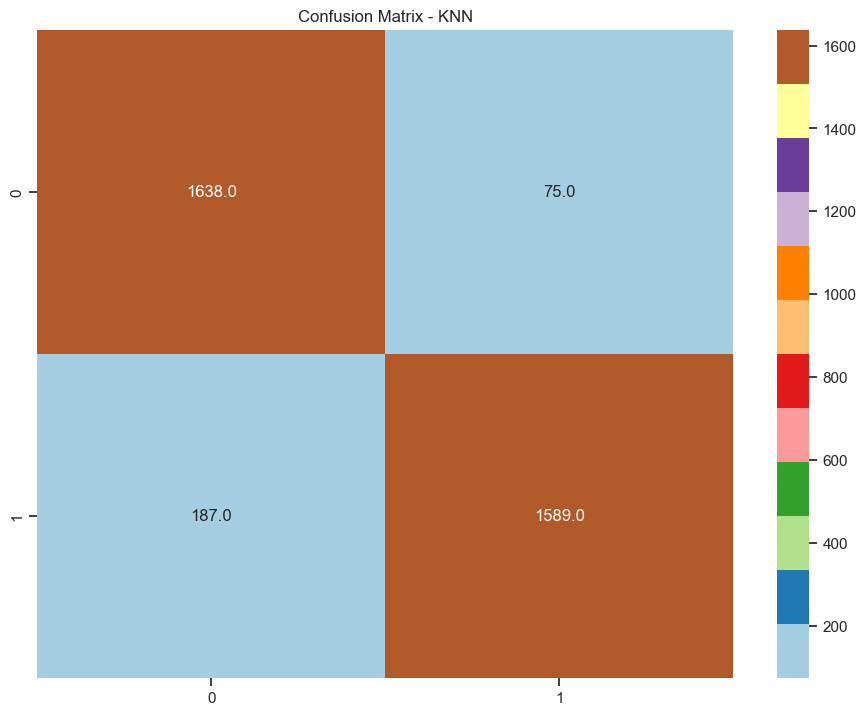

In [141]:
# Confusion matrix
matrix_confusion_4 = confusion_matrix(y_test, model_knn_pred)

plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - KNN'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Algoritmos boosting

Algoritmos de boosting são uma família de algoritmos de aprendizado de máquina que combinam vários modelos mais fracos para criar um modelo mais forte e de melhor desempenho. A ideia fundamental por trás dos algoritmos de boosting é que, ao se concentrar nas instâncias mais difíceis de classificar, é possível melhorar a capacidade preditiva do modelo final.

Os algoritmos de boosting geralmente funcionam de forma iterativa, construindo uma sequência de modelos em que cada novo modelo é ajustado para corrigir as falhas dos modelos anteriores. A cada iteração, o algoritmo dá mais peso às instâncias que foram classificadas incorretamente nas iterações anteriores, fazendo com que o próximo modelo se concentre nelas. Dessa forma, o algoritmo foca nas instâncias mais desafiadoras e tenta "impulsionar" seu desempenho.

Os algoritmos de boosting são amplamente utilizados em problemas de classificação e regressão, onde têm demonstrado um bom desempenho. Eles são robustos em relação a ruídos e outliers e podem capturar relações complexas entre as características. No entanto, eles podem ser computacionalmente intensivos e requerem ajuste cuidadoso dos hiperparâmetros para evitar overfitting.

Os algoritmos de boosting têm sido aplicados com sucesso em uma variedade de domínios, como detecção de fraudes, previsão de churn (abandono de clientes), sistemas de recomendação, processamento de linguagem natural, visão computacional, entre outros.

# Modelo 01 - XGBoost

XGBoost (Extreme Gradient Boosting) é uma implementação otimizada do algoritmo de gradient boosting que se destaca por sua eficiência e desempenho. Foi desenvolvido por Tianqi Chen como uma extensão da biblioteca Gradient Boosting Machine (GBM). O XGBoost é amplamente utilizado em competições de ciência de dados e aplicado em diversos problemas de aprendizado de máquina, como classificação, regressão e ranking. Ele se destaca por sua capacidade de lidar com grandes conjuntos de dados, alta velocidade de treinamento e melhorias em relação às implementações tradicionais de gradient boosting. As principais características do XGBoost incluem:

Regularização: O XGBoost incorpora técnicas de regularização para evitar o overfitting. Ele permite a aplicação de termos de penalidade nas funções de perda, como L1 (regularização Lasso) e L2 (regularização Ridge), para controlar a complexidade do modelo.

Divisão de características: O XGBoost suporta diferentes critérios de divisão para árvores de decisão, como ganho de informação, ganho de ganho (gain), ganho de Friedman e aproximações lineares.

Construção de árvores otimizada: O XGBoost utiliza um algoritmo eficiente para construir árvores de decisão durante o processo de treinamento. Isso inclui construção incremental da árvore, cálculo aproximado de ganhos e suporte para paralelismo.

Gerenciamento de memória: O XGBoost tem um sistema de gerenciamento de memória eficiente que reduz a utilização de memória durante o treinamento.

Funções de perda personalizadas: O XGBoost permite a definição de funções de perda personalizadas, permitindo que o algoritmo seja adaptado para diferentes problemas e métricas de avaliação.

Suporte multiplataforma: O XGBoost é uma biblioteca multiplataforma, disponível em várias linguagens de programação, como Python, R, Java, Scala, entre outras.

Devido às suas melhorias em relação ao algoritmo de gradient boosting tradicional, o XGBoost se tornou uma escolha popular em competições de ciência de dados, onde a precisão e eficiência são fundamentais. Ele também é aplicado em muitos cenários do mundo real, como análise de dados, previsão de demanda, detecção de fraudes, personalização de recomendações e muito mais. O XGBoost continua sendo uma área ativa de pesquisa e desenvolvimento, com atualizações e aprimoramentos contínuos para oferecer um desempenho ainda melhor em problemas de aprendizado de máquina.

In [148]:
# Importando biblioteca
from xgboost import XGBClassifier

# Criando modelo
xgb = XGBClassifier()

# Treinamento do modelo
xgb_fit = xgb.fit(x_train, y_train)

# Score do modelo
xgb_score = xgb.score(x_train, y_train)
print("Modelo - XGBoost: %.2f" % (xgb_score * 100))

Modelo - XGBoost: 99.74


In [149]:
# Previsão do modelo - XGBoost

xgb_pred = xgb.predict(x_test)
xgb_pred

array([0, 0, 1, ..., 0, 0, 0])

In [150]:
accuracy_XGBoost = accuracy_score(y_test, xgb_pred)
print("Accuracy - XGBoost: %.2f" % (accuracy_XGBoost * 100))

Accuracy - XGBoost: 98.19


In [151]:
matrix_confusion_2 = confusion_matrix(y_test, xgb_pred)

print('Confusion matrix - XGBoost \n\n', matrix_confusion_2)
print('\nTrue Positives(TP) = ', matrix_confusion_2[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion_2[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion_2[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion_2[1,0])

Confusion matrix - XGBoost 

 [[1687   26]
 [  37 1739]]

True Positives(TP) =  1687

True Negatives(TN) =  1739

False Positives(FP) =  26

False Negatives(FN) =  37


In [153]:
classification = classification_report(y_test, xgb_pred)
print("Modelo 01 - XGBoost")
print()
print(classification)

Modelo 01 - XGBoost

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1713
           1       0.99      0.98      0.98      1776

    accuracy                           0.98      3489
   macro avg       0.98      0.98      0.98      3489
weighted avg       0.98      0.98      0.98      3489



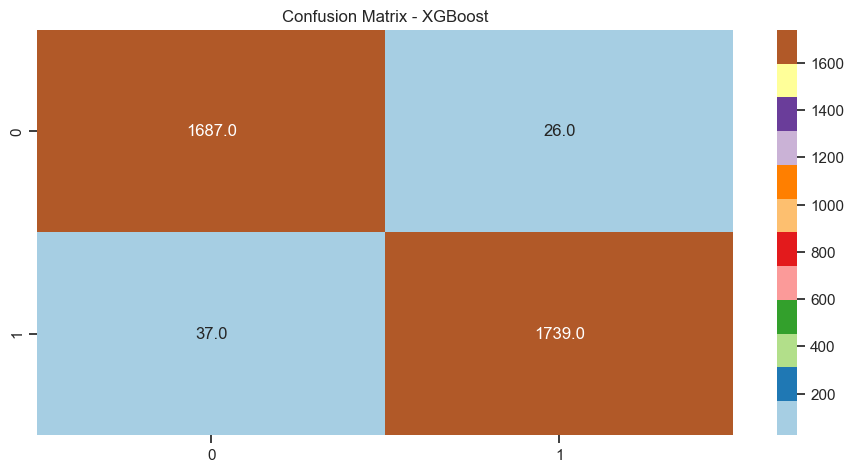

In [154]:
# Confusion_matrix
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_2, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - XGBoost'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Modelo 02 - Gradient Boosting

Gradient Boosting é uma técnica de aprendizado de máquina que pertence à família de algoritmos de boosting. O Gradient Boosting constrói um modelo preditivo forte combinando vários modelos mais fracos, como árvores de decisão simples, de forma sequencial e iterativa. A principal ideia do Gradient Boosting é ajustar cada modelo sucessivo para corrigir os erros residuais dos modelos anteriores. Isso é feito usando gradientes descendentes (gradient descent) em um processo de otimização. Cada modelo é treinado para prever os resíduos do modelo anterior, permitindo que o modelo final se concentre nas áreas em que os modelos anteriores tiveram dificuldade. Aqui está uma descrição geral de como o Gradient Boosting funciona:

A) Inicialização: O processo começa com um modelo inicial simples, chamado de modelo base, que pode ser uma estimativa ingênua (por exemplo, prever a média do conjunto de dados).

B) Iteração: Em cada iteração, um novo modelo é adicionado à combinação para melhorar o desempenho geral. Para isso, o algoritmo calcula os resíduos (diferença entre as previsões do modelo atual e os rótulos reais) do modelo anterior.

C) Treinamento do novo modelo: O novo modelo é treinado para prever os resíduos do modelo anterior. Isso é feito ajustando os parâmetros do novo modelo usando gradientes descendentes para minimizar a função de perda.

D) Combinação dos modelos: Os modelos anteriores e o novo modelo são combinados, geralmente por meio de uma soma ponderada, atribuindo pesos para cada modelo de acordo com sua contribuição para a melhoria geral.

E) Atualização dos pesos: Os pesos das instâncias do conjunto de treinamento são atualizados com base nos resíduos do novo modelo. Isso permite que as instâncias mais difíceis sejam mais ponderadas nas próximas iterações.

F) Iteração contínua: O processo é repetido por um número pré-definido de iterações, adicionando novos modelos, ajustando seus pesos e atualizando os pesos das instâncias.

Ao final do processo de iteração, o modelo final de Gradient Boosting é uma combinação ponderada de todos os modelos individuais. Ele é capaz de fazer previsões mais precisas, pois cada modelo sucessivo se concentra em corrigir os erros residuais do modelo anterior. Gradient Boosting é conhecido por sua capacidade de lidar com problemas complexos de aprendizado de máquina e pode capturar relações não lineares entre as características. Além disso, existem implementações otimizadas de Gradient Boosting, como XGBoost, LightGBM e CatBoost, que fornecem melhorias de desempenho e recursos adicionais. O Gradient Boosting tem sido amplamente aplicado em várias tarefas de aprendizado de máquina, incluindo classificação, regressão, ranking, detecção de anomalias e outros problemas de aprendizado supervisionado. Sua flexibilidade e desempenho o tornam uma escolha popular em muitos domínios de aplicação.

In [198]:
from sklearn.ensemble import GradientBoostingClassifier

# Criando o modelo Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100,
                                   learning_rate=0.1, 
                                   random_state=42)

# Treinando o modelo
model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [191]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(x_test)

In [224]:
# Avaliando o modelo
accuracy_Gradient_Boosting= accuracy_score(y_test, y_pred)
print("Acurácia do modelo: {:.2f}%".format(accuracy_Gradient_Boosting * 100))

Acurácia do modelo: 97.56%


In [195]:
matrix_confusion_2 = confusion_matrix(y_test, y_pred)

print('Confusion matrix - Gradient Boosting \n\n', matrix_confusion_2)
print('\nTrue Positives(TP) = ', matrix_confusion_2[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion_2[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion_2[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion_2[1,0])

Confusion matrix - Gradient Boosting 

 [[1633   80]
 [ 102 1674]]

True Positives(TP) =  1633

True Negatives(TN) =  1674

False Positives(FP) =  80

False Negatives(FN) =  102


In [196]:
classification = classification_report(y_test, y_pred)
print("Modelo 02 - Gradient Boosting")
print()
print(classification)

Modelo 02 - Gradient Boosting

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1713
           1       0.95      0.94      0.95      1776

    accuracy                           0.95      3489
   macro avg       0.95      0.95      0.95      3489
weighted avg       0.95      0.95      0.95      3489



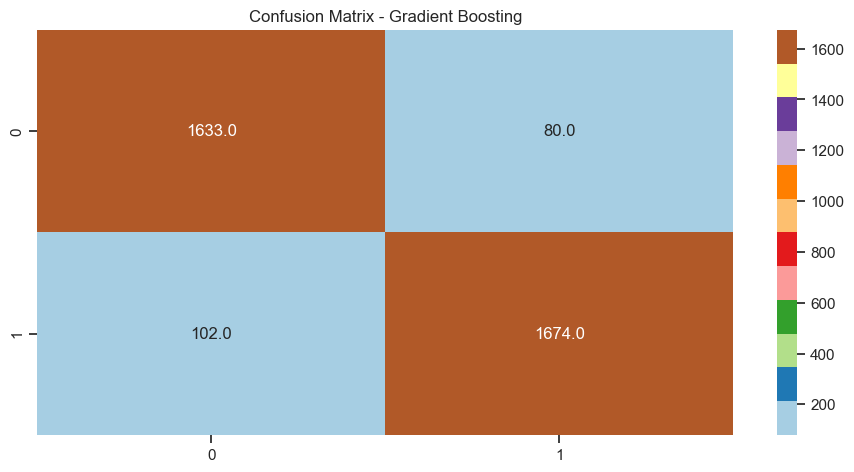

In [197]:
# Confusion_matrix
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_2, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Gradient Boosting'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Modelo 03 - AdaBoost

AdaBoost (Adaptive Boosting) é um algoritmo de aprendizado de máquina que pertence à família de algoritmos de boosting. O AdaBoost é projetado para melhorar o desempenho de modelos de aprendizado de máquina fracos, também conhecidos como "weak learners", combinando-os para formar um modelo mais forte e preciso. A ideia principal por trás do AdaBoost é atribuir pesos às instâncias do conjunto de treinamento, dando mais importância às instâncias classificadas incorretamente nas iterações anteriores. Em cada iteração, o AdaBoost ajusta um modelo fraco aos dados, com foco nas instâncias mais desafiadoras ou "difíceis" de classificar. Aqui está uma descrição geral de como o AdaBoost funciona:

A) Inicialização dos pesos: No início do processo, todas as instâncias do conjunto de treinamento são inicializadas com pesos iguais.

B) Iteração: O algoritmo passa por várias iterações, chamadas de rounds. Em cada round, um modelo fraco é treinado no conjunto de treinamento ponderado, levando em consideração os pesos das instâncias.

C) Ajuste do modelo fraco: O modelo fraco é ajustado para minimizar a taxa de erro ponderada, onde as instâncias mais difíceis têm pesos maiores. O tipo de modelo fraco utilizado pode variar, mas geralmente são usados modelos simples, como árvores de decisão rasas (stumps) ou regressores lineares.

D) Atualização dos pesos: Os pesos das instâncias são atualizados com base nas previsões do modelo fraco. As instâncias classificadas incorretamente recebem um peso maior, enquanto as instâncias classificadas corretamente recebem um peso menor.

E) Combinação dos modelos: Os modelos fracos são combinados para formar um modelo final mais forte. A combinação é feita atribuindo pesos a cada modelo com base em sua taxa de erro no treinamento.

F) Peso das previsões: Durante a fase de previsão, os modelos fracos são ponderados de acordo com seus pesos e suas previsões são combinadas para obter a previsão final.

O AdaBoost é conhecido por sua capacidade de lidar com problemas complexos de classificação e por sua habilidade de se adaptar aos erros cometidos pelos modelos anteriores. O algoritmo concentra-se nas instâncias mais difíceis, ajustando os pesos para corrigir esses erros e melhorar o desempenho geral do modelo final. O AdaBoost tem sido aplicado em diversas áreas, incluindo detecção de objetos, reconhecimento de faces, classificação de documentos, entre outros. É um algoritmo popular que oferece um bom equilíbrio entre simplicidade e desempenho, especialmente quando combinado com modelos fracos adequados.

In [200]:
%%time

# Importando biblioteca
from sklearn.ensemble import AdaBoostClassifier

# Criando uma instância
model_ada = AdaBoostClassifier(random_state=0)

# Treinamento modelo
model_ada_fit = model_ada.fit(x_train, y_train)

CPU times: total: 15.6 ms
Wall time: 241 ms


In [226]:
# Score modelo
model_score_ada = model_ada.score(x_train, y_train)
print("Score modelo AdaBoost: %.2f" % (model_score_ada * 100))

Score modelo AdaBoost: 92.97


In [202]:
# Previsão do modelo

ada_pred = model_ada.predict(x_test)
ada_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [204]:
# Accuracy score
accuracy_ada = accuracy_score(y_test, ada_pred)
print("Accuracy - Ada Boost: %.2f" % (accuracy_ada * 100))

Accuracy - Ada Boost: 93.49


In [205]:
# Classification report
classification = classification_report(y_test, ada_pred)
print("Modelo 02 - Ada Boost")
print()
print(classification)

Modelo 02 - Ada Boost

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1713
           1       0.94      0.93      0.94      1776

    accuracy                           0.93      3489
   macro avg       0.93      0.94      0.93      3489
weighted avg       0.94      0.93      0.93      3489



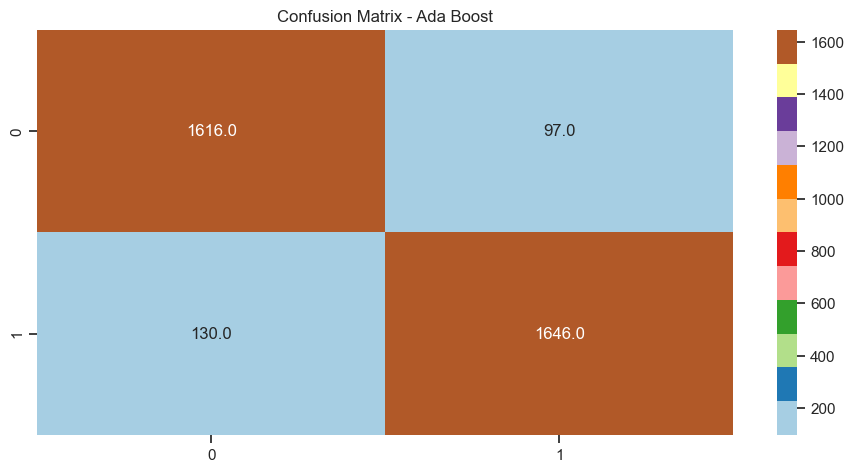

In [207]:
# Confusion_matrix
matrix_confusion_2 = confusion_matrix(y_test, ada_pred)

plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_2, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Ada Boost'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Modelo 04 - LightGBM

LightGBM (Light Gradient Boosting Machine) é uma biblioteca open-source desenvolvida pelo Microsoft Research e projetada para resolver problemas de machine learning usando a técnica de boosting. É uma implementação eficiente do algoritmo de gradient boosting, que é um tipo de algoritmo de aprendizado de máquina baseado em árvores de decisão.

O LightGBM foi projetado para ser rápido e escalável, sendo capaz de lidar com grandes conjuntos de dados e trabalhar eficientemente em máquinas com recursos limitados. Ele utiliza uma série de otimizações para reduzir o uso de memória e acelerar o processo de treinamento.

Algumas características e vantagens do LightGBM incluem:

Algoritmo de Gradient Boosting: O LightGBM é baseado no algoritmo de gradient boosting, que é uma técnica de aprendizado de máquina enriquecida que combina múltiplas árvores de decisão fracas para formar um modelo mais forte.

Split de Folhas: Uma das otimizações mais notáveis do LightGBM é o split de folhas, onde as folhas das árvores são divididas de forma otimizada, reduzindo a perda de informações e melhorando a eficiência.

Leaf-wise Growth: O LightGBM utiliza o crescimento da árvore de forma leaf-wise (folha por folha), ao contrário do depth-wise (nível por nível) usado em muitas outras implementações. Isso acelera o treinamento, pois as folhas com maior ganho são priorizadas.

Suporte a Dados Esparsos: O LightGBM é capaz de lidar eficientemente com dados esparsos, o que é comum em muitos cenários do mundo real.

Balanceamento de Classes: O LightGBM possui opções para lidar com problemas de classes desbalanceadas, tornando-o mais adequado para tarefas de classificação em que as classes têm diferentes quantidades de exemplos.

GPU Support: O LightGBM também oferece suporte para uso de GPUs, permitindo acelerar ainda mais o treinamento em hardware compatível.

In [210]:
import lightgbm as lgb

# Criando o modelo LightGBM
model = lgb.LGBMClassifier()

# Treinando o modelo
model.fit(x_train, y_train)

LGBMClassifier()

In [218]:
# Fazendo previsões no conjunto de teste
y_pred2 = model.predict(x_test)

In [219]:
# Avaliando o modelo
accuracy_LightGBM = accuracy_score(y_test, y_pred2)
print("Acurácia do modelo LightGBM: {:.2f}%".format(accuracy_LightGBM * 100))

Acurácia do modelo LightGBM: 97.56%


In [215]:
# Classification report
classification = classification_report(y_test, ada_pred)
print("Modelo 04 - LightGBM")
print()
print(classification)

Modelo 04 - LightGBM

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1713
           1       0.94      0.93      0.94      1776

    accuracy                           0.93      3489
   macro avg       0.93      0.94      0.93      3489
weighted avg       0.94      0.93      0.93      3489



In [222]:
# Confusion_matrix
matrix_confusion4 = confusion_matrix(y_test, y_pred2)

print('Confusion matrix - LightGBM \n\n', matrix_confusion4)
print('\nTrue Positives(TP) = ', matrix_confusion4[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion4[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion4[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion4[1,0])

Confusion matrix - LightGBM 

 [[1675   38]
 [  47 1729]]

True Positives(TP) =  1675

True Negatives(TN) =  1729

False Positives(FP) =  38

False Negatives(FN) =  47


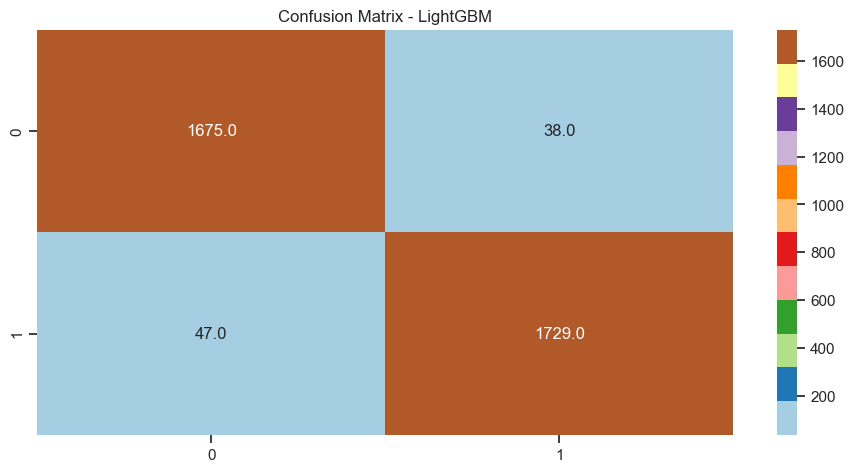

In [217]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion3, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - LightGBM'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Algoritmos bagging

Os algoritmos de bagging (bootstrap aggregating) são uma família de algoritmos de aprendizado de máquina ensemble que combinam várias instâncias de modelos de aprendizado de máquina para obter um modelo final mais robusto e geralmente com melhor desempenho. A ideia principal do bagging é treinar múltiplos modelos em diferentes subconjuntos do conjunto de treinamento e, em seguida, combinar suas previsões para fazer a previsão final.

# Modelo 1 - Random forest

Random Forest: O Random Forest é uma variação do bagging que utiliza árvores de decisão como modelos base. Ele cria várias amostras de treinamento, assim como o bagging, mas também faz seleção aleatória de características em cada divisão das árvores de decisão. Isso ajuda a aumentar a diversidade dos modelos e reduzir a correlação entre eles.

In [161]:
%%time

# Importando biblioteca
from sklearn.ensemble import RandomForestClassifier

# Criando modelo
model_random_forest = RandomForestClassifier(max_depth = 2, random_state = 0) # max_depth - determinando total de árvore, random_state 0

# Treinamento modelo
model_random_forest_fit = model_random_forest.fit(x_train, y_train) # Dados de treino, teste de x, y

CPU times: total: 78.1 ms
Wall time: 245 ms


In [162]:
# Score modelo
model_random_forest_score = model_random_forest.score(x_train, y_train)

# Valor da Accuracy do algoritmo 
print("Score - Modelo random forest: %.2f" % (model_random_forest_score * 100))

Score - Modelo random forest: 86.67


In [156]:
# Previsão do modelo
model_random_forest_regressor_pred = model_random_forest.predict(x_test)
model_random_forest_regressor_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
# Accuracy score
accuracy_random_forest = accuracy_score(y_test, model_random_forest_regressor_pred)
print("Accuracy - Random forest: %.2f" % (accuracy_random_forest * 100))

Accuracy - Random forest: 86.19


In [159]:
# Classification report
classification = classification_report(y_test, model_random_forest_regressor_pred)
print("Modelo 01 - Random forest")
print()
print(classification)

Modelo 01 - Random forest

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1713
           1       0.90      0.82      0.86      1776

    accuracy                           0.86      3489
   macro avg       0.87      0.86      0.86      3489
weighted avg       0.87      0.86      0.86      3489



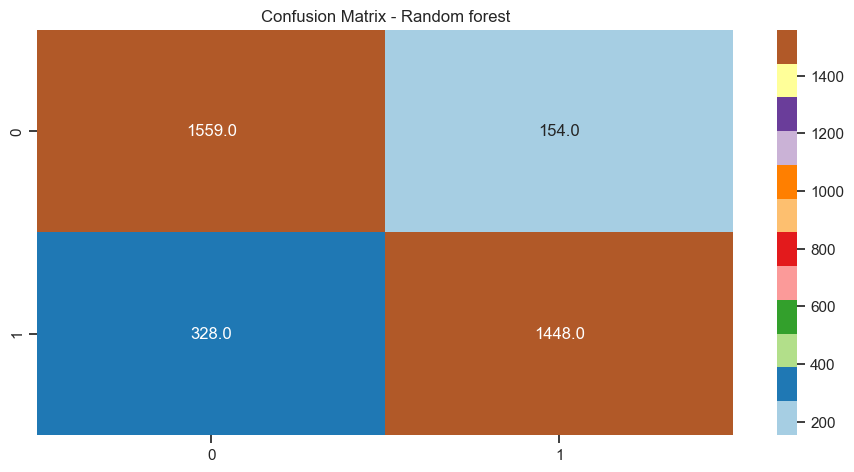

In [158]:
# confusion matrix
matrix_confusion_6 = confusion_matrix(y_test, model_random_forest_regressor_pred)

plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_6, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Random forest'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Modelo 02 - Bagging (Bootstrap Aggregating)

O bagging é o algoritmo original de bagging. Ele cria múltiplas amostras de treinamento, selecionadas aleatoriamente com substituição do conjunto de treinamento original. Cada amostra de treinamento é usada para treinar um modelo base, como árvores de decisão, e as previsões dos modelos são combinadas para obter a previsão final.

In [160]:
%%time

# Importando biblioteca
from sklearn.ensemble import BaggingClassifier

# Criar o modelo base (classificador fraco)
base_model = DecisionTreeClassifier(max_depth=3)

# Criar o modelo Bagging
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=10, random_state=42)

# Treinar o modelo Bagging
bagging_model.fit(x_train, y_train)

CPU times: total: 15.6 ms
Wall time: 71.9 ms


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  random_state=42)

In [163]:
# Fazer previsões no conjunto de teste
y_pred = bagging_model.predict(x_test)

In [164]:
# Accuracy score
accuracy_bagging_model = accuracy_score(y_test, y_pred)
print("Accuracy - Bagging: %.2f" % (accuracy_random_forest * 100))

Accuracy - Bagging: 86.19


In [166]:
# Classification report
classification = classification_report(y_test, y_pred)
print("Modelo 02 - Bagging")
print()
print(classification)

Modelo 02 - Bagging

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1713
           1       0.90      0.83      0.87      1776

    accuracy                           0.87      3489
   macro avg       0.87      0.87      0.87      3489
weighted avg       0.87      0.87      0.87      3489



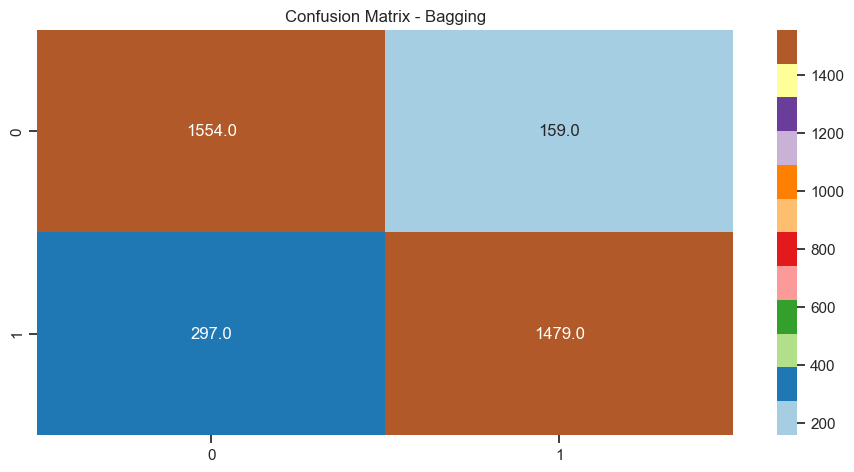

In [168]:
# confusion matrix
matrix_confusion_6 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_6, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Bagging'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Modelo 03 - Extra Trees

O Extra Trees é uma extensão do Random Forest em que as árvores de decisão são construídas com divisões aleatórias em vez de usar o critério padrão de divisão. Essa aleatoriedade adicional na construção das árvores pode reduzir a variância e melhorar a capacidade de generalização

In [169]:
%%time

# Importando biblioteca
from sklearn.ensemble import ExtraTreesClassifier

# Criar o modelo Extra Trees
model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Treinar o modelo Extra Trees
model.fit(x_train, y_train)

CPU times: total: 219 ms
Wall time: 519 ms


ExtraTreesClassifier(random_state=42)

In [170]:
# Fazer previsões no conjunto de teste
y_pred2 = model.predict(x_test)

In [171]:
# Accuracy score
accuracy_extra_tree = accuracy_score(y_test, y_pred)
print("Accuracy - Extra Trees: %.2f" % (accuracy_extra_tree * 100))

Accuracy - Extra Trees: 86.93


In [172]:
# Classification report
classification = classification_report(y_test, y_pred)
print("Modelo 03 - Extra trees")
print()
print(classification)

Modelo 03 - Extra trees

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1713
           1       0.90      0.83      0.87      1776

    accuracy                           0.87      3489
   macro avg       0.87      0.87      0.87      3489
weighted avg       0.87      0.87      0.87      3489



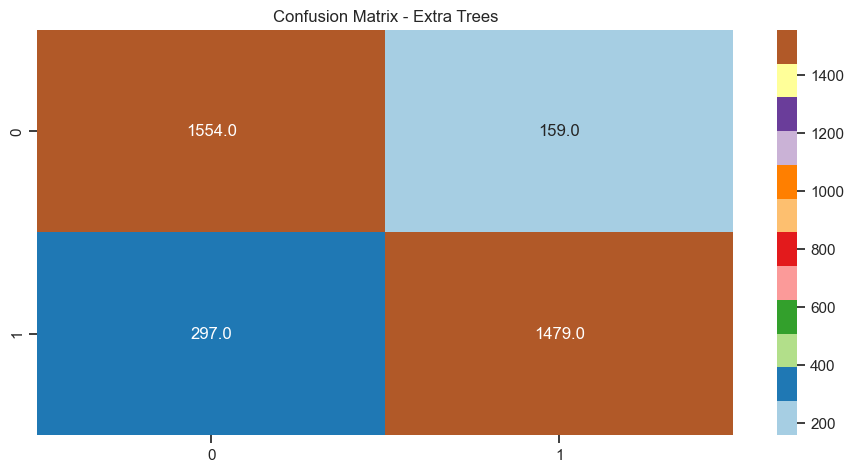

In [174]:
# confusion matrix
matrix_confusion_7 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_7, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Extra Trees'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Modelo 04 - Stacking

Stacking (também conhecido como stacked generalization) é uma técnica de aprendizado de máquina ensemble que combina múltiplos modelos para obter uma previsão final mais precisa e robusta. Ao contrário do bagging e do boosting, que combinam as previsões de vários modelos de forma paralela ou sequencial, o stacking envolve treinar um modelo adicional chamado de "meta-modelo" que utiliza as previsões dos modelos base como entradas. Aqui estão os passos principais do processo de stacking:

Treinamento dos modelos base: Diferentes modelos de aprendizado de máquina são treinados em um conjunto de treinamento. Cada modelo base é treinado em todo o conjunto de treinamento e faz previsões para o conjunto de teste.

Criação do conjunto de treinamento para o meta-modelo: As previsões dos modelos base para o conjunto de treinamento são combinadas em um novo conjunto de treinamento. Cada instância desse conjunto contém as previsões dos modelos base como características e o rótulo verdadeiro.

Treinamento do meta-modelo: O meta-modelo é treinado usando o conjunto de treinamento criado na etapa anterior. Ele recebe as previsões dos modelos base como entradas e tenta aprender como combinar essas previsões para fazer uma previsão final mais precisa.

Previsão final: O meta-modelo treinado é usado para fazer a previsão final em novos conjuntos de dados. Ele recebe as previsões dos modelos base como entradas e produz a previsão final.

A ideia por trás do stacking é que o meta-modelo pode aprender a combinar as previsões dos modelos base de forma a capturar os pontos fortes de cada modelo. Dessa forma, o meta-modelo pode corrigir possíveis erros dos modelos base e melhorar o desempenho geral do ensemble. É importante destacar que os modelos base no stacking podem ser diferentes algoritmos de aprendizado de máquina ou variações de um mesmo algoritmo com diferentes configurações. O objetivo é criar diversidade entre os modelos base para que o meta-modelo possa aproveitar as diferentes perspectivas e correlações entre as previsões.

O stacking é uma técnica avançada de ensemble que pode ser aplicada em uma variedade de problemas de aprendizado de máquina. No entanto, é importante ter cuidado com o risco de overfitting, especialmente ao treinar o meta-modelo com um conjunto de treinamento pequeno. Estratégias como validação cruzada e regularização podem ser aplicadas para mitigar esse risco.

In [175]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Definir os modelos base
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

# Definir o modelo meta-classificador
meta_model = LogisticRegression()

# Criar o modelo Stacking
stacking_model = StackingClassifier(
    
    estimators=[('rf', model1), 
                ('knn', model2), 
                ('lr', model3)],
    
    final_estimator=meta_model
)

# Treinar o modelo Stacking
stacking_model.fit(x_train, y_train)

CPU times: total: 1.25 s
Wall time: 4.06 s


StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [177]:
# Fazer previsões no conjunto de teste

y_pred = stacking_model.predict(x_test)

In [178]:
# Accuracy score
accuracy_stacking = accuracy_score(y_test, y_pred)
print("Accuracy - Stacking Classifier: %.2f" % (accuracy_stacking * 100))

Accuracy - Stacking Classifier: 97.05


In [179]:
# Classification report
classification = classification_report(y_test, y_pred)
print("Modelo 04 - Stacking Classifier")
print()
print(classification)

Modelo 04 - Stacking Classifier

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1713
           1       0.97      0.97      0.97      1776

    accuracy                           0.97      3489
   macro avg       0.97      0.97      0.97      3489
weighted avg       0.97      0.97      0.97      3489



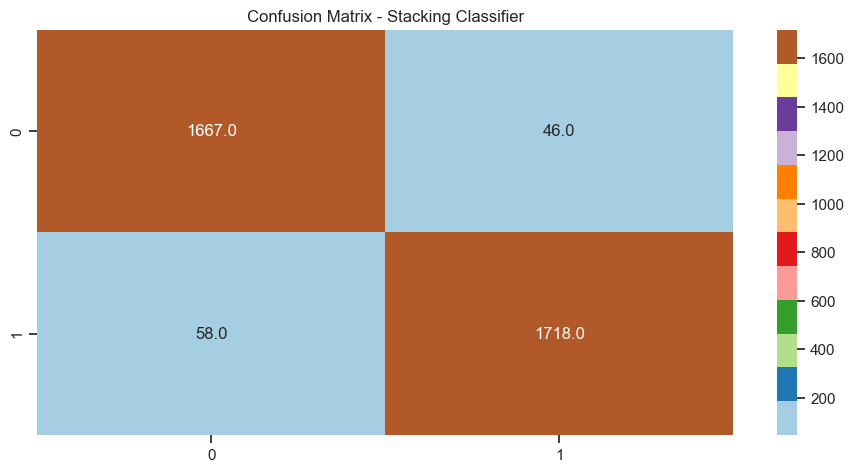

In [182]:
# confusion matrix
matrix_confusion_8 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_8, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 

ax.set_title('Confusion Matrix - Stacking Classifier'); 
ax.xaxis.set_ticklabels(["0", "1"]); 
ax.yaxis.set_ticklabels(["0", "1"]);

# Modelo 05 - Voting

Voting (votação) é uma técnica de aprendizado de máquina ensemble em que várias previsões de diferentes modelos são combinadas para chegar a uma previsão final. Essa técnica é baseada no princípio de que a opinião coletiva de vários modelos pode fornecer uma previsão mais precisa e robusta do que um único modelo. Existem diferentes abordagens para o voting, incluindo:

Majority Voting (votação majoritária): Cada modelo no ensemble faz uma previsão e a classe ou valor mais frequente é escolhido como a previsão final. No caso de classificação binária, se a classe mais frequente for igualmente dividida, pode-se usar um critério de desempate, como escolher a classe com a maior probabilidade média entre os modelos.

Weighted Voting (votação ponderada): Cada modelo no ensemble faz uma previsão e atribui-se um peso a cada modelo com base em sua confiabilidade ou desempenho no conjunto de treinamento. As previsões são ponderadas pelos respectivos pesos e a previsão final é obtida somando ou combinando as previsões ponderadas.

Soft Voting (votação suave): Em vez de simplesmente escolher a classe ou valor mais frequente, os modelos atribuem probabilidades ou pontuações para cada classe ou valor. As probabilidades ou pontuações de cada modelo são combinadas e normalizadas, e a previsão final é baseada nessas probabilidades normalizadas.

O tipo de voting a ser usado depende do problema em questão, dos tipos de modelos no ensemble e da natureza das previsões desejadas. O majority voting é comumente usado para problemas de classificação binária ou multiclasse, enquanto o weighted voting e o soft voting são usados quando há confiança diferenciada nos modelos ou quando é desejada uma abordagem mais suave. Voting é uma técnica simples, porém poderosa, que é amplamente aplicada em diversas áreas e problemas de aprendizado de máquina. Ele pode ser usado para combinar diferentes tipos de modelos, como árvores de decisão, regressão linear, SVM, redes neurais, entre outros. A escolha dos modelos no ensemble e a estratégia de votação adequada dependem do contexto do problema, da disponibilidade de dados e dos requisitos de desempenho.

In [183]:
%%time

# Importando biblioteca
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Definir os modelos individuais
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = KNeighborsClassifier(n_neighbors=3)
model3 = LogisticRegression()

# Criar o modelo de Voting (votação)
voting_model = VotingClassifier(
    estimators=[('rf', model1), ('knn', model2), ('lr', model3)],
    voting='hard'  # Use 'hard' para votação por maioria ou 'soft' para votação ponderada
)

# Treinar o modelo de Voting
voting_model.fit(x_train, y_train)

CPU times: total: 234 ms
Wall time: 734 ms


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('lr', LogisticRegression())])

In [184]:
# Fazer previsões no conjunto de teste
y_pred3 = voting_model.predict(x_test)

In [185]:
# Accuracy score
accuracy_voting = accuracy_score(y_test, y_pred)
print("Accuracy - Voting Classifier: %.2f" % (accuracy_voting * 100))

Accuracy - Voting Classifier: 97.05


In [187]:
# Classification report
classification = classification_report(y_test, y_pred)
print("Modelo 05 - Voting Classifier")
print()
print(classification)

Modelo 05 - Voting Classifier

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1713
           1       0.97      0.97      0.97      1776

    accuracy                           0.97      3489
   macro avg       0.97      0.97      0.97      3489
weighted avg       0.97      0.97      0.97      3489



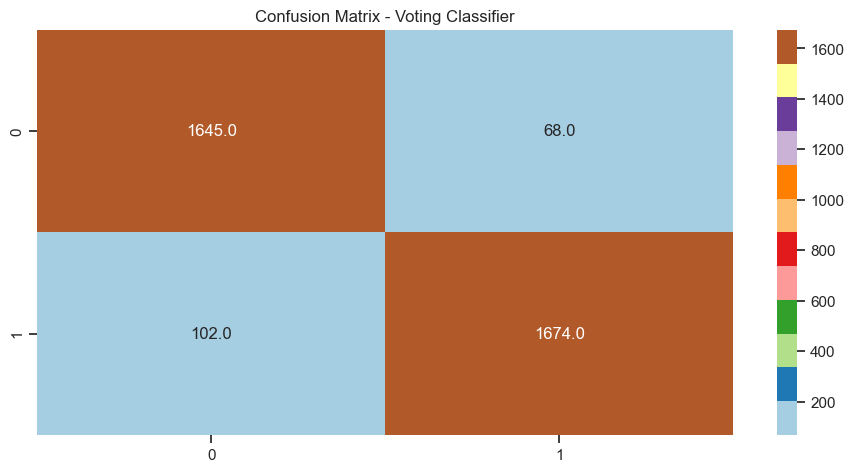

In [186]:
# confusion matrix
matrix_confusion_9 = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_9, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 

ax.set_title('Confusion Matrix - Voting Classifier'); 
ax.xaxis.set_ticklabels(["0", "1"]); 
ax.yaxis.set_ticklabels(["0", "1"]);

# Resultado final

In [229]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Regressão logistica", 
               "K-NN", 
               "Random Forest", 
               "Decision Tree",
               "Naive Bayes",
                "XGBoost",
               "Gradient Boosting",
                "bagging",
               "Ada Boost",
               "LightGBM",
                "Extra tree",
                "stacking",
                "Voting"],

    "Acurácia" :[accuracy_dt,
                 accuracy_nb, 
                 acuracia_decision_tree, 
                 accuracy_knn,
                 accuracy_XGBoost,
                 accuracy_Gradient_Boosting,
                 accuracy_ada,
                 accuracy_LightGBM,
                 accuracy_random_forest, 
                 accuracy_bagging_model, 
                 accuracy_extra_tree,
                 accuracy_stacking,
                 accuracy_voting]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Models,Acurácia
4,Naive Bayes,0.981943
5,XGBoost,0.975638
7,bagging,0.975638
11,stacking,0.970479
12,Voting,0.970479
6,Gradient Boosting,0.934938
3,Decision Tree,0.924907
0,Regressão logistica,0.896245
2,Random Forest,0.889367
9,LightGBM,0.869304


# Salvando modelo 

In [231]:
# Importando biblioteca pickle
import pickle

# Salvando o modelo em formato .pkl - Modelo - Naive bayes
with open("model_naive_bayes.pkl", "wb") as f:
    pickle.dump(model_naive_bayes, f)
    
    
# Salvando o modelo em formato .pkl - XGBoost
with open("model_XGBoost.pkl", "wb") as f:
    pickle.dump(xgb, f)

# Conclusão

Neste projeto de Machine Learning, o objetivo era prever a eficácia de existidores de incêndio. Para alcançar esse propósito, foram utilizados dois tipos de algoritmos: o Bagging e o Boosting. A análise dos resultados teve como foco a identificação do algoritmo mais fraco e do melhor desempenho.

Após a realização do experimento, constatou-se que o algoritmo de Naive Bayes apresentou o melhor resultado, obtendo uma acurácia ótima. Em segundo lugar, ficou o algoritmo XGBoost, que também obteve um desempenho notável na tarefa de previsão.

Esses resultados permitem afirmar que o modelo desenvolvido mostrou-se eficaz na previsão da efetividade dos existidores de incêndio. Entretanto, para aprimorar ainda mais a precisão do modelo, o próximo passo seria a otimização do projeto utilizando hiperparâmetros, pipeline e validação cruzada durante o processo de treinamento do modelo. Isso contribuirá para uma melhor generalização do modelo, evitando overfitting e permitindo uma avaliação mais robusta do seu desempenho.

Por fim, o objetivo final é fazer o deploy do modelo de Machine Learning na web, tornando-o acessível e funcional para uma ampla gama de usuários. Dessa forma, será possível aproveitar a eficácia do algoritmo Naive Bayes na identificação dos existidores de incêndio mais eficientes, melhorando a segurança em diversos ambientes.

Em resumo, os resultados obtidos até o momento mostram que o algoritmo Naive Bayes se destacou como o melhor modelo, demonstrando eficácia na tarefa de previsão dos existidores de incêndio. Contudo, ainda há espaço para otimização e aprimoramento do projeto, o que será realizado através da utilização de hiperparâmetros, pipeline e validação cruzada. Por fim, com o modelo refinado, a ideia é disponibilizá-lo na web para uso prático e efetivo.

Referência

Link 1 - https://medium.com/turing-talks/como-fazer-uma-an%C3%A1lise-de-sentimentos-com-vader-21bbe3f3e38d

Link 2 - https://medium.com/equals-lab/uma-breve-introdu%C3%A7%C3%A3o-ao-algoritmo-de-machine-learning-gradient-boosting-utilizando-a-biblioteca-311285783099

Link 3 - https://medium.com/data-hackers/pr%C3%A9-processamento-de-dados-com-python-53b95bcf5ff4

Link 4 - https://medium.com/somos-tera/como-modelar-t%C3%B3picos-atrav%C3%A9s-de-latent-dirichlet-allocation-lda-atrav%C3%A9s-da-biblioteca-gensim-1fa17357ad4b